* Preprocessing :
- Data augmentation :
      > noise_addition
      > time_shift
      > time_stretch
      > pitch_shift
      
* Modeling :
- CNN : From scratch

In [1]:
import pandas as pd
import IPython.display as ipd
import numpy as np
from pathlib import Path
import librosa
import matplotlib.pyplot as plt

import random
import soundfile as sf

%load_ext autotime

In [2]:
train = pd.read_csv('Train.csv')
train.head()

,fn,label
0,audio_files/IV38R7F.wav,akawuka
1,audio_files/KM4SKWT.wav,banana
2,audio_files/F5POSU9.wav,obulwadde
3,audio_files/MMVDXG2.wav,nnyaanya
4,audio_files/9TVM96F.wav,pampu


In [3]:
train.label.nunique()

193

In [4]:
train.shape

(1109, 2)

<AxesSubplot:ylabel='Frequency'>

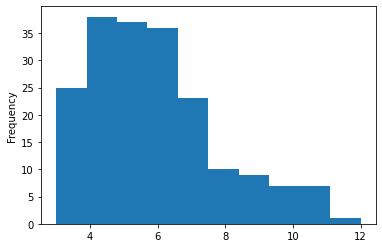

In [5]:
# Plot a histogram showing how common different counts are
train.groupby('label').count()['fn'].plot(kind='hist')

In [18]:
def plot_spec(data:np.array,sr:int,title:str, fpath:str) -> None:
    '''
    Function for plotting spectrogram along with amplitude wave graph
    '''
    label = str(fpath).split('/')[-1].split('_')[0]
    
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    
    ax[0].title.set_text(f'{title} / Label: {label}')
    ax[0].specgram(data,Fs=2)
    ax[1].set_ylabel('Amplitude')
    ax[1].plot(np.linspace(0,1,len(data)), data)

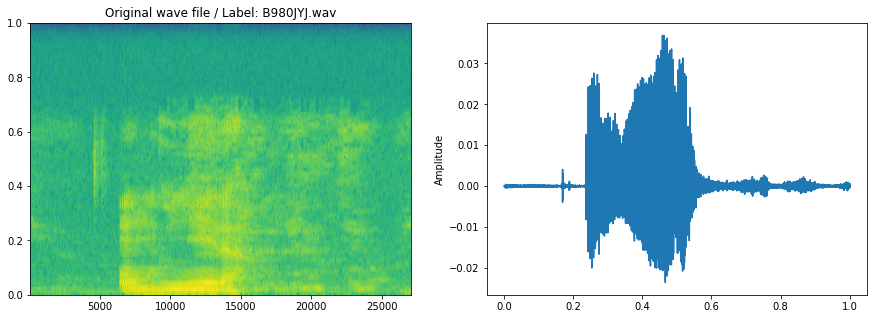

In [21]:
#Reading the wav file:
file_path = train.fn.sample().values[0]
wav, sr = librosa.load(file_path,sr=None)

#Plotting the spectrogram and wave graph
plot_spec(wav,sr,'Original wave file',file_path)

In [23]:
ipd.Audio(data=wav,rate=sr)

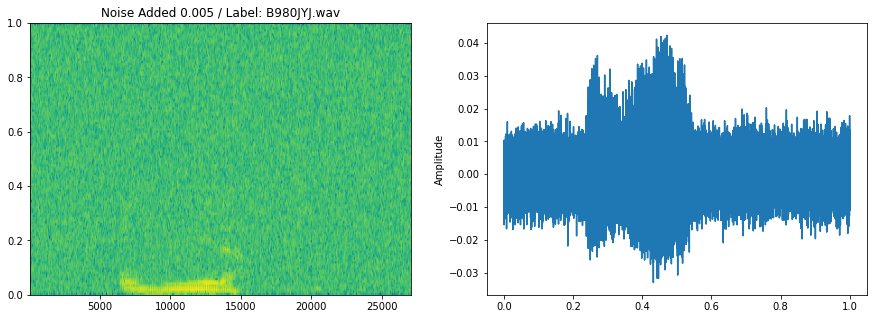

In [36]:
'''
Noise addition using normal distribution with mean = 0 and std =1
Permissible noise factor value = x > 0.004
'''

wav_n = wav + 0.005*np.random.normal(0,1,len(wav))
plot_spec(wav_n,sr,'Noise Added 0.005',file_path)
ipd.Audio(data=wav_n,rate=sr)
# librosa.output.write_wav('./noise_add.wav',wav_n,sr)

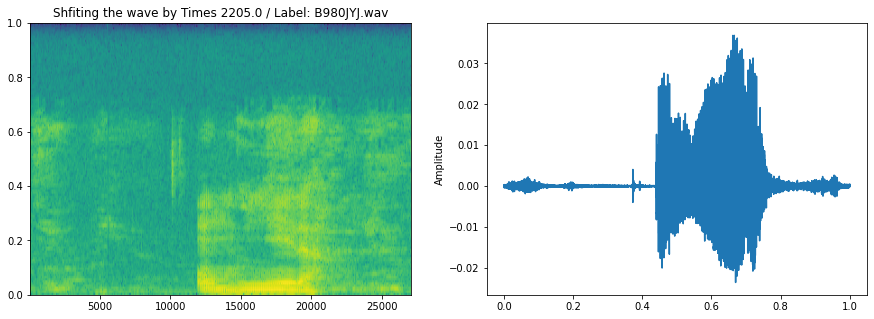

In [31]:
'''
Permissible factor values = sr/10
'''

wav_roll = np.roll(wav,int(sr/2))
plot_spec(data=wav_roll,sr=sr,title=f'Shfiting the wave by Times {sr/10}',fpath=file_path)
ipd.Audio(wav_roll,rate=sr)
# librosa.output.write_wav('./roll.wav',wav_roll,sr)

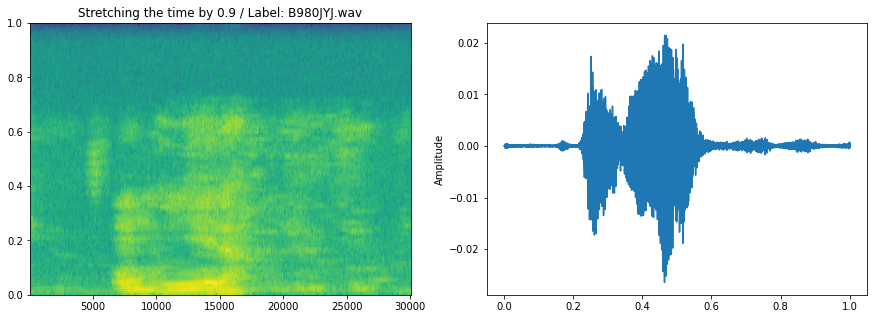

In [43]:
'''
Permissible factor values = 0 < x < 1.0
'''

factor = 0.9
wav_time_stch = librosa.effects.time_stretch(wav,factor)
plot_spec(data=wav_time_stch,sr=sr,title=f'Stretching the time by {factor}',fpath=file_path)
ipd.Audio(wav_time_stch,rate=sr)

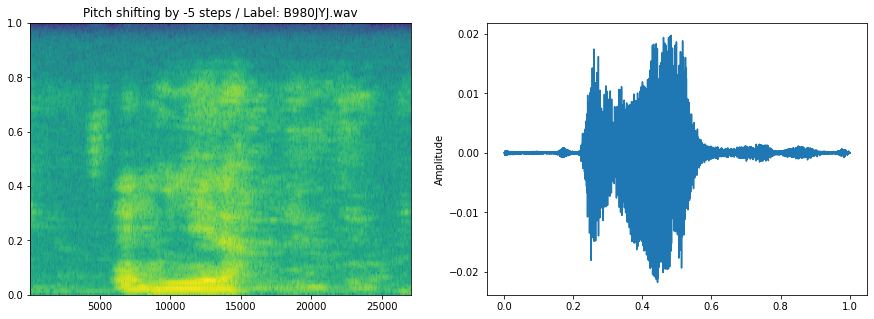

In [45]:
'''
Permissible factor values = -5 <= x <= 5
'''
wav_pitch_sf = librosa.effects.pitch_shift(wav,sr,n_steps=3)
plot_spec(data=wav_pitch_sf,sr=sr,title=f'Pitch shifting by {-5} steps',fpath=file_path)
ipd.Audio(wav_pitch_sf,rate=sr)

In [48]:
aug_size = 50

augmentation_config = {'noise_addition' : np.random.uniform(low=0.001, high=0.005, size=(aug_size,)),
                       'time_shift' : np.random.randint(low=2, high=10, size=aug_size),
                       'time_stretch' : np.random.uniform(low=0.5, high=0.9, size=(aug_size,)),
                       'pitch_shift' : np.random.randint(low=-4, high=4, size=aug_size)}

In [58]:
aug_data = []

for index, row in train.iterrows():
    wav, sr = librosa.load(Path(row["fn"]),sr=None)
    
    new_name_prefix = 'audio_files_augmented/' + row["fn"].split('/')[-1].split('.')[0]
    
    n_operations = np.random.randint(low=1, high=5)
    # add noise
    for i in range(n_operations):
        factor = np.random.uniform(low=0.001, high=0.005)
        wav_n = wav + factor*np.random.normal(0,1,len(wav))
        new_name = new_name_prefix + '_noise_' + str(factor).split('.')[-1] +'.wav'
        #librosa.output.write_wav(new_name,wav_n,sr)
        sf.write(new_name, wav_n, sr)
        aug_data.append((new_name, row["label"]))
        print(new_name)
    
    n_operations = np.random.randint(low=1, high=5)
    # add time shift
    for i in range(n_operations):
        factor = np.random.randint(low=2, high=10)
        wav_n = np.roll(wav,int(sr/factor))
        new_name = new_name_prefix + '_shift_' + str(factor).split('.')[-1] +'.wav'
        sf.write(new_name, wav_n, sr)
        aug_data.append((new_name, row["label"]))
        print(new_name)
    
    n_operations = np.random.randint(low=1, high=5)
    # add time stretch
    for i in range(n_operations):
        factor = np.random.uniform(low=0.5, high=0.9)
        wav_n = librosa.effects.time_stretch(wav,factor)
        new_name = new_name_prefix + '_stretch_' + str(factor).split('.')[-1] +'.wav'
        sf.write(new_name, wav_n, sr)
        aug_data.append((new_name, row["label"]))
        print(new_name)
    
    n_operations = np.random.randint(low=1, high=5)
    # add pitch shift
    for i in range(n_operations):
        factor = np.random.randint(low=-4, high=4)
        wav_n = librosa.effects.pitch_shift(wav,sr,n_steps=factor)
        new_name = new_name_prefix + '_pitch_' + str(factor).split('.')[-1] +'.wav'
        sf.write(new_name, wav_n, sr)
        aug_data.append((new_name, row["label"]))
        print(new_name)

audio_files_augmented/IV38R7F_noise_004196605766384931.wav
audio_files_augmented/IV38R7F_noise_0029285383793636673.wav
audio_files_augmented/IV38R7F_noise_0036888769336915245.wav
audio_files_augmented/IV38R7F_noise_0010060955585527221.wav
audio_files_augmented/IV38R7F_shift_6.wav
audio_files_augmented/IV38R7F_stretch_7559812310177334.wav
audio_files_augmented/IV38R7F_stretch_8669739801022094.wav
audio_files_augmented/IV38R7F_pitch_-4.wav
audio_files_augmented/IV38R7F_pitch_0.wav
audio_files_augmented/KM4SKWT_noise_002653340857161039.wav
audio_files_augmented/KM4SKWT_shift_7.wav
audio_files_augmented/KM4SKWT_shift_9.wav
audio_files_augmented/KM4SKWT_stretch_5635769812140906.wav
audio_files_augmented/KM4SKWT_stretch_794610992497693.wav
audio_files_augmented/KM4SKWT_pitch_2.wav
audio_files_augmented/KM4SKWT_pitch_1.wav
audio_files_augmented/KM4SKWT_pitch_-1.wav
audio_files_augmented/KM4SKWT_pitch_2.wav
audio_files_augmented/F5POSU9_noise_0018591681315416025.wav
audio_files_augmented/F5POS

audio_files_augmented/AN3RKKH_pitch_-3.wav
audio_files_augmented/IT0E3VU_noise_0035108048299646996.wav
audio_files_augmented/IT0E3VU_noise_002625808761321579.wav
audio_files_augmented/IT0E3VU_noise_0024713205815450404.wav
audio_files_augmented/IT0E3VU_noise_0034410750395224192.wav
audio_files_augmented/IT0E3VU_shift_9.wav
audio_files_augmented/IT0E3VU_shift_6.wav
audio_files_augmented/IT0E3VU_shift_9.wav
audio_files_augmented/IT0E3VU_stretch_5655622623265857.wav
audio_files_augmented/IT0E3VU_stretch_8418944748969706.wav
audio_files_augmented/IT0E3VU_pitch_-2.wav
audio_files_augmented/IT0E3VU_pitch_0.wav
audio_files_augmented/PWKKJQN_noise_0021684840303431577.wav
audio_files_augmented/PWKKJQN_noise_004673762850788861.wav
audio_files_augmented/PWKKJQN_noise_0012374914411102883.wav
audio_files_augmented/PWKKJQN_shift_7.wav
audio_files_augmented/PWKKJQN_shift_6.wav
audio_files_augmented/PWKKJQN_shift_8.wav
audio_files_augmented/PWKKJQN_stretch_6261943183874725.wav
audio_files_augmented/PWK

audio_files_augmented/PAS7GSH_pitch_-3.wav
audio_files_augmented/PAS7GSH_pitch_3.wav
audio_files_augmented/PAS7GSH_pitch_-4.wav
audio_files_augmented/PAS7GSH_pitch_3.wav
audio_files_augmented/RV5Z1ER_noise_004074172129674247.wav
audio_files_augmented/RV5Z1ER_shift_2.wav
audio_files_augmented/RV5Z1ER_stretch_7310300943797464.wav
audio_files_augmented/RV5Z1ER_pitch_-2.wav
audio_files_augmented/RV5Z1ER_pitch_-4.wav
audio_files_augmented/RV5Z1ER_pitch_-2.wav
audio_files_augmented/OUG88S4_noise_004773031124933016.wav
audio_files_augmented/OUG88S4_noise_0027724673445980574.wav
audio_files_augmented/OUG88S4_noise_0046850006339084005.wav
audio_files_augmented/OUG88S4_noise_002799364889146368.wav
audio_files_augmented/OUG88S4_shift_5.wav
audio_files_augmented/OUG88S4_shift_7.wav
audio_files_augmented/OUG88S4_shift_3.wav
audio_files_augmented/OUG88S4_stretch_894733503138841.wav
audio_files_augmented/OUG88S4_stretch_5278354945615926.wav
audio_files_augmented/OUG88S4_stretch_5302302697001786.wav
a

audio_files_augmented/ESE6A2W_stretch_6523851444768838.wav
audio_files_augmented/ESE6A2W_stretch_6881482731900843.wav
audio_files_augmented/ESE6A2W_stretch_8366232371227376.wav
audio_files_augmented/ESE6A2W_pitch_3.wav
audio_files_augmented/ESE6A2W_pitch_3.wav
audio_files_augmented/ESE6A2W_pitch_-2.wav
audio_files_augmented/ESE6A2W_pitch_3.wav
audio_files_augmented/516YFMT_noise_0017355547216483438.wav
audio_files_augmented/516YFMT_shift_2.wav
audio_files_augmented/516YFMT_shift_5.wav
audio_files_augmented/516YFMT_stretch_6184543642449011.wav
audio_files_augmented/516YFMT_stretch_6476669779153232.wav
audio_files_augmented/516YFMT_stretch_759272314531239.wav
audio_files_augmented/516YFMT_stretch_8130443236051919.wav
audio_files_augmented/516YFMT_pitch_-3.wav
audio_files_augmented/516YFMT_pitch_-3.wav
audio_files_augmented/5FD7H7O_noise_0023674373729160487.wav
audio_files_augmented/5FD7H7O_noise_004946310032718575.wav
audio_files_augmented/5FD7H7O_shift_8.wav
audio_files_augmented/5FD7H7

audio_files_augmented/BF2ME8D_pitch_-2.wav
audio_files_augmented/BF2ME8D_pitch_2.wav
audio_files_augmented/CSBBLYY_noise_003450190330822221.wav
audio_files_augmented/CSBBLYY_noise_0026608881937568722.wav
audio_files_augmented/CSBBLYY_noise_001494557404424851.wav
audio_files_augmented/CSBBLYY_shift_4.wav
audio_files_augmented/CSBBLYY_shift_5.wav
audio_files_augmented/CSBBLYY_stretch_5657340087434577.wav
audio_files_augmented/CSBBLYY_stretch_8973067085618812.wav
audio_files_augmented/CSBBLYY_pitch_1.wav
audio_files_augmented/AE3WTTT_noise_002496431691739915.wav
audio_files_augmented/AE3WTTT_shift_6.wav
audio_files_augmented/AE3WTTT_shift_8.wav
audio_files_augmented/AE3WTTT_stretch_8720465563292563.wav
audio_files_augmented/AE3WTTT_stretch_7741922521347233.wav
audio_files_augmented/AE3WTTT_pitch_-2.wav
audio_files_augmented/AE3WTTT_pitch_2.wav
audio_files_augmented/AE3WTTT_pitch_-3.wav
audio_files_augmented/BZWU00G_noise_002143935473082772.wav
audio_files_augmented/BZWU00G_noise_001886301

audio_files_augmented/FXIXWXE_pitch_-1.wav
audio_files_augmented/FXIXWXE_pitch_3.wav
audio_files_augmented/VDRMW9E_noise_0019212677531052016.wav
audio_files_augmented/VDRMW9E_noise_004053983083938793.wav
audio_files_augmented/VDRMW9E_noise_003591050863973657.wav
audio_files_augmented/VDRMW9E_noise_0016699123321980505.wav
audio_files_augmented/VDRMW9E_shift_9.wav
audio_files_augmented/VDRMW9E_stretch_6735370992756781.wav
audio_files_augmented/VDRMW9E_pitch_3.wav
audio_files_augmented/VDRMW9E_pitch_1.wav
audio_files_augmented/VDRMW9E_pitch_-1.wav
audio_files_augmented/VDRMW9E_pitch_0.wav
audio_files_augmented/XU04GSG_noise_002653660860635525.wav
audio_files_augmented/XU04GSG_noise_003785181256207836.wav
audio_files_augmented/XU04GSG_noise_0010937831983999864.wav
audio_files_augmented/XU04GSG_shift_9.wav
audio_files_augmented/XU04GSG_shift_7.wav
audio_files_augmented/XU04GSG_stretch_8542767963953823.wav
audio_files_augmented/XU04GSG_stretch_8682283512508226.wav
audio_files_augmented/XU04G

audio_files_augmented/S8HWJ63_stretch_6012400816747888.wav
audio_files_augmented/S8HWJ63_stretch_8855792692622961.wav
audio_files_augmented/S8HWJ63_stretch_5667422089625075.wav
audio_files_augmented/S8HWJ63_stretch_622814972848978.wav
audio_files_augmented/S8HWJ63_pitch_-1.wav
audio_files_augmented/S8HWJ63_pitch_2.wav
audio_files_augmented/TESJUNV_noise_00434768988127917.wav
audio_files_augmented/TESJUNV_noise_00391644344517638.wav
audio_files_augmented/TESJUNV_noise_002881751223030097.wav
audio_files_augmented/TESJUNV_shift_3.wav
audio_files_augmented/TESJUNV_shift_7.wav
audio_files_augmented/TESJUNV_shift_5.wav
audio_files_augmented/TESJUNV_shift_7.wav
audio_files_augmented/TESJUNV_stretch_6047890798503457.wav
audio_files_augmented/TESJUNV_stretch_7032733051773854.wav
audio_files_augmented/TESJUNV_stretch_5354802016908004.wav
audio_files_augmented/TESJUNV_stretch_8716373393398933.wav
audio_files_augmented/TESJUNV_pitch_0.wav
audio_files_augmented/TESJUNV_pitch_0.wav
audio_files_augme

audio_files_augmented/K86X5P4_stretch_8461845303392947.wav
audio_files_augmented/K86X5P4_pitch_-3.wav
audio_files_augmented/SEIYX2K_noise_002600243716153426.wav
audio_files_augmented/SEIYX2K_shift_3.wav
audio_files_augmented/SEIYX2K_stretch_6560240177779036.wav
audio_files_augmented/SEIYX2K_stretch_8849232401357566.wav
audio_files_augmented/SEIYX2K_pitch_-2.wav
audio_files_augmented/SEIYX2K_pitch_2.wav
audio_files_augmented/KIYZFMO_noise_001533655046016583.wav
audio_files_augmented/KIYZFMO_shift_5.wav
audio_files_augmented/KIYZFMO_shift_2.wav
audio_files_augmented/KIYZFMO_shift_3.wav
audio_files_augmented/KIYZFMO_stretch_8562267325373225.wav
audio_files_augmented/KIYZFMO_stretch_6772532808654064.wav
audio_files_augmented/KIYZFMO_pitch_-3.wav
audio_files_augmented/KIYZFMO_pitch_-1.wav
audio_files_augmented/KIYZFMO_pitch_-2.wav
audio_files_augmented/KIYZFMO_pitch_1.wav
audio_files_augmented/56GCZH4_noise_0035523772132739534.wav
audio_files_augmented/56GCZH4_noise_0025654493783701417.wav


audio_files_augmented/SFWD9U7_stretch_5889971075545932.wav
audio_files_augmented/SFWD9U7_pitch_-1.wav
audio_files_augmented/SFWD9U7_pitch_-2.wav
audio_files_augmented/OQWUZJZ_noise_001319533371700102.wav
audio_files_augmented/OQWUZJZ_noise_003115060680835362.wav
audio_files_augmented/OQWUZJZ_noise_0037482582910439914.wav
audio_files_augmented/OQWUZJZ_noise_00489738518678377.wav
audio_files_augmented/OQWUZJZ_shift_8.wav
audio_files_augmented/OQWUZJZ_stretch_6590080393750325.wav
audio_files_augmented/OQWUZJZ_stretch_7627086273178643.wav
audio_files_augmented/OQWUZJZ_pitch_-3.wav
audio_files_augmented/OQWUZJZ_pitch_3.wav
audio_files_augmented/0WYNJTG_noise_003491130145471153.wav
audio_files_augmented/0WYNJTG_shift_2.wav
audio_files_augmented/0WYNJTG_shift_2.wav
audio_files_augmented/0WYNJTG_shift_2.wav
audio_files_augmented/0WYNJTG_stretch_7784173738621409.wav
audio_files_augmented/0WYNJTG_stretch_6050472440660173.wav
audio_files_augmented/0WYNJTG_stretch_6171331837186345.wav
audio_files_

audio_files_augmented/RH1WRCA_pitch_3.wav
audio_files_augmented/RH1WRCA_pitch_-4.wav
audio_files_augmented/X57XGVW_noise_003848809406842985.wav
audio_files_augmented/X57XGVW_noise_0025081146723141805.wav
audio_files_augmented/X57XGVW_noise_0014816245154750183.wav
audio_files_augmented/X57XGVW_shift_2.wav
audio_files_augmented/X57XGVW_shift_5.wav
audio_files_augmented/X57XGVW_shift_3.wav
audio_files_augmented/X57XGVW_shift_8.wav
audio_files_augmented/X57XGVW_stretch_5790881609716602.wav
audio_files_augmented/X57XGVW_stretch_7863788522269408.wav
audio_files_augmented/X57XGVW_stretch_5081600021806367.wav
audio_files_augmented/X57XGVW_stretch_7814068640527538.wav
audio_files_augmented/X57XGVW_pitch_1.wav
audio_files_augmented/MYJ9E3Z_noise_004805562236506766.wav
audio_files_augmented/MYJ9E3Z_shift_2.wav
audio_files_augmented/MYJ9E3Z_shift_8.wav
audio_files_augmented/MYJ9E3Z_shift_3.wav
audio_files_augmented/MYJ9E3Z_shift_2.wav
audio_files_augmented/MYJ9E3Z_stretch_556417191720026.wav
audio

audio_files_augmented/BK8UDCM_pitch_2.wav
audio_files_augmented/BK8UDCM_pitch_-2.wav
audio_files_augmented/1F3IM80_noise_0012045524531515738.wav
audio_files_augmented/1F3IM80_noise_0021168072936512032.wav
audio_files_augmented/1F3IM80_shift_9.wav
audio_files_augmented/1F3IM80_shift_8.wav
audio_files_augmented/1F3IM80_shift_8.wav
audio_files_augmented/1F3IM80_shift_6.wav
audio_files_augmented/1F3IM80_stretch_8093740095271349.wav
audio_files_augmented/1F3IM80_stretch_8861216769100946.wav
audio_files_augmented/1F3IM80_stretch_7450843019060359.wav
audio_files_augmented/1F3IM80_pitch_-1.wav
audio_files_augmented/1F3IM80_pitch_1.wav
audio_files_augmented/1F3IM80_pitch_-4.wav
audio_files_augmented/CJP6X83_noise_0036084194572845803.wav
audio_files_augmented/CJP6X83_noise_004933405648483029.wav
audio_files_augmented/CJP6X83_noise_0014069986064649358.wav
audio_files_augmented/CJP6X83_shift_4.wav
audio_files_augmented/CJP6X83_shift_4.wav
audio_files_augmented/CJP6X83_shift_9.wav
audio_files_augme

audio_files_augmented/T51P266_stretch_5162297330363393.wav
audio_files_augmented/T51P266_stretch_8655708209484652.wav
audio_files_augmented/T51P266_pitch_2.wav
audio_files_augmented/ZBWO51J_noise_0032828717551716294.wav
audio_files_augmented/ZBWO51J_shift_8.wav
audio_files_augmented/ZBWO51J_shift_7.wav
audio_files_augmented/ZBWO51J_shift_6.wav
audio_files_augmented/ZBWO51J_stretch_6876931235972948.wav
audio_files_augmented/ZBWO51J_stretch_7148061789448429.wav
audio_files_augmented/ZBWO51J_stretch_6421359049920726.wav
audio_files_augmented/ZBWO51J_pitch_1.wav
audio_files_augmented/ZBWO51J_pitch_1.wav
audio_files_augmented/ZBWO51J_pitch_1.wav
audio_files_augmented/ZBWO51J_pitch_-4.wav
audio_files_augmented/N1GM3F9_noise_00371281247622095.wav
audio_files_augmented/N1GM3F9_noise_0027194509058775197.wav
audio_files_augmented/N1GM3F9_noise_0044359991848948645.wav
audio_files_augmented/N1GM3F9_noise_0014496930140851067.wav
audio_files_augmented/N1GM3F9_shift_4.wav
audio_files_augmented/N1GM3F

audio_files_augmented/NFRV36E_pitch_2.wav
audio_files_augmented/NFRV36E_pitch_-1.wav
audio_files_augmented/DGR5DBX_noise_002239058227752694.wav
audio_files_augmented/DGR5DBX_shift_7.wav
audio_files_augmented/DGR5DBX_shift_4.wav
audio_files_augmented/DGR5DBX_shift_7.wav
audio_files_augmented/DGR5DBX_stretch_5159065755048191.wav
audio_files_augmented/DGR5DBX_stretch_7989136730307955.wav
audio_files_augmented/DGR5DBX_pitch_-1.wav
audio_files_augmented/DGR5DBX_pitch_-4.wav
audio_files_augmented/DGR5DBX_pitch_2.wav
audio_files_augmented/JMSP150_noise_001290685713022263.wav
audio_files_augmented/JMSP150_noise_0036312367869762822.wav
audio_files_augmented/JMSP150_noise_002127068975234274.wav
audio_files_augmented/JMSP150_noise_0011561896629954482.wav
audio_files_augmented/JMSP150_shift_7.wav
audio_files_augmented/JMSP150_shift_9.wav
audio_files_augmented/JMSP150_stretch_8827823583733474.wav
audio_files_augmented/JMSP150_stretch_5813169859066621.wav
audio_files_augmented/JMSP150_stretch_798697

audio_files_augmented/JPBXRKO_pitch_1.wav
audio_files_augmented/P65KWVN_noise_003506457475268403.wav
audio_files_augmented/P65KWVN_noise_0023917666955816912.wav
audio_files_augmented/P65KWVN_noise_002048112335831736.wav
audio_files_augmented/P65KWVN_shift_9.wav
audio_files_augmented/P65KWVN_shift_7.wav
audio_files_augmented/P65KWVN_stretch_639333683993556.wav
audio_files_augmented/P65KWVN_pitch_-1.wav
audio_files_augmented/P65KWVN_pitch_1.wav
audio_files_augmented/KEOO762_noise_0016231723603290058.wav
audio_files_augmented/KEOO762_shift_3.wav
audio_files_augmented/KEOO762_shift_2.wav
audio_files_augmented/KEOO762_shift_4.wav
audio_files_augmented/KEOO762_stretch_6670677689319513.wav
audio_files_augmented/KEOO762_stretch_8998055623571501.wav
audio_files_augmented/KEOO762_pitch_-4.wav
audio_files_augmented/KEOO762_pitch_0.wav
audio_files_augmented/KEOO762_pitch_-4.wav
audio_files_augmented/Q5ZSXI6_noise_0025608324502557874.wav
audio_files_augmented/Q5ZSXI6_noise_0019317253956126384.wav
a

audio_files_augmented/23M4E0E_stretch_7443210897830141.wav
audio_files_augmented/23M4E0E_pitch_0.wav
audio_files_augmented/23M4E0E_pitch_-2.wav
audio_files_augmented/VZHJ6SY_noise_0013977659828574446.wav
audio_files_augmented/VZHJ6SY_noise_00472422489180855.wav
audio_files_augmented/VZHJ6SY_noise_003201371673876856.wav
audio_files_augmented/VZHJ6SY_shift_3.wav
audio_files_augmented/VZHJ6SY_shift_2.wav
audio_files_augmented/VZHJ6SY_shift_7.wav
audio_files_augmented/VZHJ6SY_shift_9.wav
audio_files_augmented/VZHJ6SY_stretch_5099173453464095.wav
audio_files_augmented/VZHJ6SY_stretch_6783804108015141.wav
audio_files_augmented/VZHJ6SY_pitch_2.wav
audio_files_augmented/VZHJ6SY_pitch_3.wav
audio_files_augmented/VZHJ6SY_pitch_-2.wav
audio_files_augmented/VZHJ6SY_pitch_2.wav
audio_files_augmented/4JHNZF2_noise_0014696547152969414.wav
audio_files_augmented/4JHNZF2_noise_004753169796439119.wav
audio_files_augmented/4JHNZF2_noise_001545463122160668.wav
audio_files_augmented/4JHNZF2_shift_8.wav
audi

audio_files_augmented/ICAKJMX_pitch_0.wav
audio_files_augmented/5QIFOI9_noise_002063108050227494.wav
audio_files_augmented/5QIFOI9_shift_3.wav
audio_files_augmented/5QIFOI9_shift_5.wav
audio_files_augmented/5QIFOI9_shift_9.wav
audio_files_augmented/5QIFOI9_stretch_8140179141888009.wav
audio_files_augmented/5QIFOI9_stretch_6770941202369254.wav
audio_files_augmented/5QIFOI9_pitch_-3.wav
audio_files_augmented/3J8WKXR_noise_004654783722557608.wav
audio_files_augmented/3J8WKXR_noise_0031361974699797737.wav
audio_files_augmented/3J8WKXR_noise_002501683132581768.wav
audio_files_augmented/3J8WKXR_shift_2.wav
audio_files_augmented/3J8WKXR_shift_3.wav
audio_files_augmented/3J8WKXR_stretch_8569233943447294.wav
audio_files_augmented/3J8WKXR_stretch_541500529790328.wav
audio_files_augmented/3J8WKXR_pitch_-4.wav
audio_files_augmented/3J8WKXR_pitch_-2.wav
audio_files_augmented/3J8WKXR_pitch_-2.wav
audio_files_augmented/3J8WKXR_pitch_2.wav
audio_files_augmented/IAWF2PB_noise_00440253256274183.wav
audi

audio_files_augmented/OYM7YQQ_shift_9.wav
audio_files_augmented/OYM7YQQ_shift_8.wav
audio_files_augmented/OYM7YQQ_stretch_5007722246022734.wav
audio_files_augmented/OYM7YQQ_stretch_6644848191749415.wav
audio_files_augmented/OYM7YQQ_stretch_5255756196329334.wav
audio_files_augmented/OYM7YQQ_pitch_2.wav
audio_files_augmented/OYM7YQQ_pitch_3.wav
audio_files_augmented/VSX6W7D_noise_003525967748589423.wav
audio_files_augmented/VSX6W7D_noise_00482718722555464.wav
audio_files_augmented/VSX6W7D_shift_9.wav
audio_files_augmented/VSX6W7D_stretch_5714704815814824.wav
audio_files_augmented/VSX6W7D_stretch_7196588747751312.wav
audio_files_augmented/VSX6W7D_stretch_5398903222125724.wav
audio_files_augmented/VSX6W7D_stretch_7726731672941347.wav
audio_files_augmented/VSX6W7D_pitch_3.wav
audio_files_augmented/VSX6W7D_pitch_-3.wav
audio_files_augmented/VSX6W7D_pitch_-2.wav
audio_files_augmented/R16F0W4_noise_0036680834293812883.wav
audio_files_augmented/R16F0W4_shift_3.wav
audio_files_augmented/R16F0W4_

audio_files_augmented/QNCCEIU_pitch_-4.wav
audio_files_augmented/QNCCEIU_pitch_2.wav
audio_files_augmented/AQZW7G0_noise_0017227569588649048.wav
audio_files_augmented/AQZW7G0_noise_004050385448796667.wav
audio_files_augmented/AQZW7G0_shift_6.wav
audio_files_augmented/AQZW7G0_shift_8.wav
audio_files_augmented/AQZW7G0_shift_5.wav
audio_files_augmented/AQZW7G0_shift_6.wav
audio_files_augmented/AQZW7G0_stretch_5016910817964628.wav
audio_files_augmented/AQZW7G0_stretch_5334262903163397.wav
audio_files_augmented/AQZW7G0_stretch_7816022039132641.wav
audio_files_augmented/AQZW7G0_stretch_5637270584652722.wav
audio_files_augmented/AQZW7G0_pitch_2.wav
audio_files_augmented/AQZW7G0_pitch_-3.wav
audio_files_augmented/740DBZK_noise_0014778185894078857.wav
audio_files_augmented/740DBZK_shift_3.wav
audio_files_augmented/740DBZK_stretch_6250762839434292.wav
audio_files_augmented/740DBZK_stretch_8176322278764765.wav
audio_files_augmented/740DBZK_stretch_6212173270004333.wav
audio_files_augmented/740DBZ

audio_files_augmented/9XW0Z3V_pitch_-4.wav
audio_files_augmented/XM7JBU2_noise_004956439538336796.wav
audio_files_augmented/XM7JBU2_shift_9.wav
audio_files_augmented/XM7JBU2_shift_2.wav
audio_files_augmented/XM7JBU2_shift_4.wav
audio_files_augmented/XM7JBU2_stretch_6445380672774981.wav
audio_files_augmented/XM7JBU2_stretch_7199759170068107.wav
audio_files_augmented/XM7JBU2_stretch_7804718845808241.wav
audio_files_augmented/XM7JBU2_pitch_-2.wav
audio_files_augmented/XM7JBU2_pitch_-1.wav
audio_files_augmented/4ZFEQ1Q_noise_0037982229170018342.wav
audio_files_augmented/4ZFEQ1Q_shift_6.wav
audio_files_augmented/4ZFEQ1Q_stretch_7328736959537426.wav
audio_files_augmented/4ZFEQ1Q_stretch_8851743797895453.wav
audio_files_augmented/4ZFEQ1Q_stretch_676771947005297.wav
audio_files_augmented/4ZFEQ1Q_pitch_3.wav
audio_files_augmented/JFHNBZU_noise_0021372007699365244.wav
audio_files_augmented/JFHNBZU_noise_001833489241025262.wav
audio_files_augmented/JFHNBZU_noise_0018516229908262468.wav
audio_file

audio_files_augmented/368FFUP_stretch_6841492479769621.wav
audio_files_augmented/368FFUP_stretch_8846236711263343.wav
audio_files_augmented/368FFUP_stretch_8785331254640312.wav
audio_files_augmented/368FFUP_pitch_-1.wav
audio_files_augmented/368FFUP_pitch_2.wav
audio_files_augmented/368FFUP_pitch_-1.wav
audio_files_augmented/DFI45CH_noise_004935578566247049.wav
audio_files_augmented/DFI45CH_shift_2.wav
audio_files_augmented/DFI45CH_shift_9.wav
audio_files_augmented/DFI45CH_shift_2.wav
audio_files_augmented/DFI45CH_shift_6.wav
audio_files_augmented/DFI45CH_stretch_6185335020467561.wav
audio_files_augmented/DFI45CH_stretch_7653994127852934.wav
audio_files_augmented/DFI45CH_pitch_-2.wav
audio_files_augmented/ZTIQXWJ_noise_0021850506526886393.wav
audio_files_augmented/ZTIQXWJ_noise_0025695983744387792.wav
audio_files_augmented/ZTIQXWJ_noise_004792653396942216.wav
audio_files_augmented/ZTIQXWJ_noise_0026676130188978383.wav
audio_files_augmented/ZTIQXWJ_shift_8.wav
audio_files_augmented/ZTIQ

audio_files_augmented/VNGWVL2_stretch_613569559271818.wav
audio_files_augmented/VNGWVL2_stretch_6648729892078891.wav
audio_files_augmented/VNGWVL2_stretch_8280890576226012.wav
audio_files_augmented/VNGWVL2_pitch_1.wav
audio_files_augmented/VNGWVL2_pitch_2.wav
audio_files_augmented/VNGWVL2_pitch_-4.wav
audio_files_augmented/VNGWVL2_pitch_2.wav
audio_files_augmented/PFLJ1HG_noise_0013132414820830594.wav
audio_files_augmented/PFLJ1HG_shift_2.wav
audio_files_augmented/PFLJ1HG_shift_5.wav
audio_files_augmented/PFLJ1HG_shift_2.wav
audio_files_augmented/PFLJ1HG_stretch_6971088184506582.wav
audio_files_augmented/PFLJ1HG_stretch_6379784719138281.wav
audio_files_augmented/PFLJ1HG_pitch_2.wav
audio_files_augmented/S4UFW8E_noise_0010752311241861636.wav
audio_files_augmented/S4UFW8E_noise_0013291244234577891.wav
audio_files_augmented/S4UFW8E_noise_0032300106511614956.wav
audio_files_augmented/S4UFW8E_shift_8.wav
audio_files_augmented/S4UFW8E_shift_6.wav
audio_files_augmented/S4UFW8E_stretch_8155630

audio_files_augmented/7KQW49S_pitch_0.wav
audio_files_augmented/7KQW49S_pitch_3.wav
audio_files_augmented/7KQW49S_pitch_-2.wav
audio_files_augmented/7KQW49S_pitch_3.wav
audio_files_augmented/R9A7OWL_noise_003788780492512744.wav
audio_files_augmented/R9A7OWL_noise_003320304547060222.wav
audio_files_augmented/R9A7OWL_noise_0033314905606919155.wav
audio_files_augmented/R9A7OWL_shift_9.wav
audio_files_augmented/R9A7OWL_shift_4.wav
audio_files_augmented/R9A7OWL_stretch_6419469214441079.wav
audio_files_augmented/R9A7OWL_stretch_6831007255158024.wav
audio_files_augmented/R9A7OWL_pitch_3.wav
audio_files_augmented/BXKRLBZ_noise_0018511288044254061.wav
audio_files_augmented/BXKRLBZ_shift_9.wav
audio_files_augmented/BXKRLBZ_shift_4.wav
audio_files_augmented/BXKRLBZ_stretch_7051573262955598.wav
audio_files_augmented/BXKRLBZ_pitch_-4.wav
audio_files_augmented/VABPKET_noise_004027442176595572.wav
audio_files_augmented/VABPKET_noise_0022468140847479636.wav
audio_files_augmented/VABPKET_noise_00489566

audio_files_augmented/KZ3PJOE_pitch_-3.wav
audio_files_augmented/KZ3PJOE_pitch_-1.wav
audio_files_augmented/LHECIQ0_noise_003711139982148222.wav
audio_files_augmented/LHECIQ0_noise_004376038313429207.wav
audio_files_augmented/LHECIQ0_noise_0045569128427267735.wav
audio_files_augmented/LHECIQ0_shift_4.wav
audio_files_augmented/LHECIQ0_stretch_6696699718079452.wav
audio_files_augmented/LHECIQ0_stretch_5618620779053394.wav
audio_files_augmented/LHECIQ0_stretch_6233506388675849.wav
audio_files_augmented/LHECIQ0_pitch_2.wav
audio_files_augmented/CBAZ9ZG_noise_002355309988033826.wav
audio_files_augmented/CBAZ9ZG_noise_0036454872539380934.wav
audio_files_augmented/CBAZ9ZG_shift_5.wav
audio_files_augmented/CBAZ9ZG_shift_6.wav
audio_files_augmented/CBAZ9ZG_shift_2.wav
audio_files_augmented/CBAZ9ZG_stretch_7700453767172815.wav
audio_files_augmented/CBAZ9ZG_stretch_8082049595084269.wav
audio_files_augmented/CBAZ9ZG_pitch_-2.wav
audio_files_augmented/CBAZ9ZG_pitch_1.wav
audio_files_augmented/CBAZ9

audio_files_augmented/439REWV_pitch_-1.wav
audio_files_augmented/439REWV_pitch_-1.wav
audio_files_augmented/KXE6NOU_noise_002867345542571342.wav
audio_files_augmented/KXE6NOU_noise_0033167733800122403.wav
audio_files_augmented/KXE6NOU_noise_004931047897060676.wav
audio_files_augmented/KXE6NOU_noise_0019158704258026588.wav
audio_files_augmented/KXE6NOU_shift_2.wav
audio_files_augmented/KXE6NOU_stretch_8470748212246558.wav
audio_files_augmented/KXE6NOU_stretch_860182394875866.wav
audio_files_augmented/KXE6NOU_stretch_8165611939822306.wav
audio_files_augmented/KXE6NOU_pitch_0.wav
audio_files_augmented/QUR1ZA8_noise_004504515408943019.wav
audio_files_augmented/QUR1ZA8_noise_003619507627951686.wav
audio_files_augmented/QUR1ZA8_shift_4.wav
audio_files_augmented/QUR1ZA8_shift_3.wav
audio_files_augmented/QUR1ZA8_stretch_8953104365383416.wav
audio_files_augmented/QUR1ZA8_stretch_8396769830325506.wav
audio_files_augmented/QUR1ZA8_stretch_8781749840257249.wav
audio_files_augmented/QUR1ZA8_pitch_3

audio_files_augmented/P0935G8_pitch_-1.wav
audio_files_augmented/P0935G8_pitch_-4.wav
audio_files_augmented/P0935G8_pitch_-3.wav
audio_files_augmented/P0935G8_pitch_1.wav
audio_files_augmented/ZIYWAIE_noise_0013979858517010678.wav
audio_files_augmented/ZIYWAIE_shift_5.wav
audio_files_augmented/ZIYWAIE_shift_6.wav
audio_files_augmented/ZIYWAIE_shift_4.wav
audio_files_augmented/ZIYWAIE_shift_9.wav
audio_files_augmented/ZIYWAIE_stretch_8529438044505371.wav
audio_files_augmented/ZIYWAIE_stretch_8286220717786316.wav
audio_files_augmented/ZIYWAIE_stretch_5148477341130964.wav
audio_files_augmented/ZIYWAIE_pitch_-1.wav
audio_files_augmented/VVIEDZV_noise_00450609350823835.wav
audio_files_augmented/VVIEDZV_shift_9.wav
audio_files_augmented/VVIEDZV_shift_8.wav
audio_files_augmented/VVIEDZV_shift_8.wav
audio_files_augmented/VVIEDZV_shift_8.wav
audio_files_augmented/VVIEDZV_stretch_6133061726270305.wav
audio_files_augmented/VVIEDZV_pitch_-3.wav
audio_files_augmented/VVIEDZV_pitch_-3.wav
audio_file

audio_files_augmented/PHKUXM6_stretch_838894046871011.wav
audio_files_augmented/PHKUXM6_pitch_-2.wav
audio_files_augmented/ZHDSQKT_noise_0037144483504123554.wav
audio_files_augmented/ZHDSQKT_noise_0033978355623260773.wav
audio_files_augmented/ZHDSQKT_noise_004546326854304537.wav
audio_files_augmented/ZHDSQKT_shift_7.wav
audio_files_augmented/ZHDSQKT_shift_6.wav
audio_files_augmented/ZHDSQKT_stretch_6154181697098411.wav
audio_files_augmented/ZHDSQKT_pitch_1.wav
audio_files_augmented/ZHDSQKT_pitch_2.wav
audio_files_augmented/ZHDSQKT_pitch_-4.wav
audio_files_augmented/VPFA1EN_noise_0010372868194491525.wav
audio_files_augmented/VPFA1EN_noise_0011989836833362735.wav
audio_files_augmented/VPFA1EN_shift_8.wav
audio_files_augmented/VPFA1EN_shift_5.wav
audio_files_augmented/VPFA1EN_shift_8.wav
audio_files_augmented/VPFA1EN_shift_2.wav
audio_files_augmented/VPFA1EN_stretch_8277895913668649.wav
audio_files_augmented/VPFA1EN_stretch_6385897147864498.wav
audio_files_augmented/VPFA1EN_stretch_898476

audio_files_augmented/Y9NMU3V_pitch_1.wav
audio_files_augmented/Y9NMU3V_pitch_-4.wav
audio_files_augmented/8SI2YA2_noise_0036952505526358904.wav
audio_files_augmented/8SI2YA2_shift_3.wav
audio_files_augmented/8SI2YA2_stretch_8662906163965842.wav
audio_files_augmented/8SI2YA2_stretch_8091422166286483.wav
audio_files_augmented/8SI2YA2_stretch_6777589658956926.wav
audio_files_augmented/8SI2YA2_pitch_-4.wav
audio_files_augmented/8SI2YA2_pitch_-1.wav
audio_files_augmented/8SI2YA2_pitch_2.wav
audio_files_augmented/8SI2YA2_pitch_-2.wav
audio_files_augmented/BW5FQFU_noise_0020881627771105267.wav
audio_files_augmented/BW5FQFU_noise_0042326164666367265.wav
audio_files_augmented/BW5FQFU_noise_0035440814795000253.wav
audio_files_augmented/BW5FQFU_shift_5.wav
audio_files_augmented/BW5FQFU_shift_5.wav
audio_files_augmented/BW5FQFU_shift_8.wav
audio_files_augmented/BW5FQFU_stretch_8639234021378905.wav
audio_files_augmented/BW5FQFU_stretch_7719113783433944.wav
audio_files_augmented/BW5FQFU_stretch_741

audio_files_augmented/1IGD6S7_pitch_3.wav
audio_files_augmented/1IGD6S7_pitch_1.wav
audio_files_augmented/1IGD6S7_pitch_-1.wav
audio_files_augmented/1IGD6S7_pitch_-2.wav
audio_files_augmented/K4GO6BO_noise_003140428325642294.wav
audio_files_augmented/K4GO6BO_noise_0017835710884276036.wav
audio_files_augmented/K4GO6BO_noise_0021612520968113027.wav
audio_files_augmented/K4GO6BO_shift_4.wav
audio_files_augmented/K4GO6BO_shift_2.wav
audio_files_augmented/K4GO6BO_stretch_7160254885482674.wav
audio_files_augmented/K4GO6BO_stretch_6438584246787569.wav
audio_files_augmented/K4GO6BO_pitch_-2.wav
audio_files_augmented/K4GO6BO_pitch_1.wav
audio_files_augmented/GGBZCXT_noise_0024849179809710597.wav
audio_files_augmented/GGBZCXT_noise_001961233268946308.wav
audio_files_augmented/GGBZCXT_noise_0028733001079026405.wav
audio_files_augmented/GGBZCXT_noise_0019144026203166253.wav
audio_files_augmented/GGBZCXT_shift_7.wav
audio_files_augmented/GGBZCXT_shift_8.wav
audio_files_augmented/GGBZCXT_shift_4.wav

audio_files_augmented/0XO08RU_pitch_-1.wav
audio_files_augmented/0XO08RU_pitch_3.wav
audio_files_augmented/F4TPZBY_noise_00348928281630116.wav
audio_files_augmented/F4TPZBY_noise_003019298529617252.wav
audio_files_augmented/F4TPZBY_noise_004998464267970574.wav
audio_files_augmented/F4TPZBY_noise_0049656418745645465.wav
audio_files_augmented/F4TPZBY_shift_2.wav
audio_files_augmented/F4TPZBY_shift_6.wav
audio_files_augmented/F4TPZBY_shift_9.wav
audio_files_augmented/F4TPZBY_stretch_7977756350805982.wav
audio_files_augmented/F4TPZBY_stretch_8308330110807762.wav
audio_files_augmented/F4TPZBY_pitch_1.wav
audio_files_augmented/F4TPZBY_pitch_1.wav
audio_files_augmented/F4TPZBY_pitch_3.wav
audio_files_augmented/F4TPZBY_pitch_2.wav
audio_files_augmented/ND9LZL0_noise_0035439196621326174.wav
audio_files_augmented/ND9LZL0_noise_0028750443302365206.wav
audio_files_augmented/ND9LZL0_noise_004921997118826479.wav
audio_files_augmented/ND9LZL0_shift_5.wav
audio_files_augmented/ND9LZL0_shift_5.wav
audi

audio_files_augmented/Y18VF0T_pitch_-2.wav
audio_files_augmented/Y18VF0T_pitch_-1.wav
audio_files_augmented/Y18VF0T_pitch_1.wav
audio_files_augmented/Y18VF0T_pitch_1.wav
audio_files_augmented/FTKOEOK_noise_0016224786557512629.wav
audio_files_augmented/FTKOEOK_noise_0026452303045350683.wav
audio_files_augmented/FTKOEOK_shift_9.wav
audio_files_augmented/FTKOEOK_shift_4.wav
audio_files_augmented/FTKOEOK_stretch_7646837067486296.wav
audio_files_augmented/FTKOEOK_stretch_6389421960687582.wav
audio_files_augmented/FTKOEOK_stretch_6849350136510198.wav
audio_files_augmented/FTKOEOK_stretch_7138670800538172.wav
audio_files_augmented/FTKOEOK_pitch_2.wav
audio_files_augmented/FTKOEOK_pitch_-1.wav
audio_files_augmented/FTKOEOK_pitch_1.wav
audio_files_augmented/4DM37ZX_noise_004097987939719765.wav
audio_files_augmented/4DM37ZX_noise_0018965808401731556.wav
audio_files_augmented/4DM37ZX_noise_0010670379108464387.wav
audio_files_augmented/4DM37ZX_shift_7.wav
audio_files_augmented/4DM37ZX_stretch_8830

audio_files_augmented/NU7IFUD_pitch_1.wav
audio_files_augmented/O1YM6R1_noise_004520893996969444.wav
audio_files_augmented/O1YM6R1_noise_003235253654432608.wav
audio_files_augmented/O1YM6R1_shift_8.wav
audio_files_augmented/O1YM6R1_shift_4.wav
audio_files_augmented/O1YM6R1_stretch_6867874498128302.wav
audio_files_augmented/O1YM6R1_stretch_6346140064548049.wav
audio_files_augmented/O1YM6R1_stretch_6031070367458524.wav
audio_files_augmented/O1YM6R1_pitch_0.wav
audio_files_augmented/3J07VMT_noise_003943744239767202.wav
audio_files_augmented/3J07VMT_noise_004978632316316897.wav
audio_files_augmented/3J07VMT_noise_001327064484252665.wav
audio_files_augmented/3J07VMT_shift_5.wav
audio_files_augmented/3J07VMT_shift_8.wav
audio_files_augmented/3J07VMT_stretch_8154565951061399.wav
audio_files_augmented/3J07VMT_stretch_5994386050377146.wav
audio_files_augmented/3J07VMT_stretch_6426299095983727.wav
audio_files_augmented/3J07VMT_stretch_8466539729312008.wav
audio_files_augmented/3J07VMT_pitch_3.wa

audio_files_augmented/313L39W_stretch_5323639613350241.wav
audio_files_augmented/313L39W_stretch_6891322671414852.wav
audio_files_augmented/313L39W_stretch_5539102812425993.wav
audio_files_augmented/313L39W_pitch_1.wav
audio_files_augmented/313L39W_pitch_1.wav
audio_files_augmented/XRDRHCJ_noise_003016865071811808.wav
audio_files_augmented/XRDRHCJ_shift_8.wav
audio_files_augmented/XRDRHCJ_shift_4.wav
audio_files_augmented/XRDRHCJ_shift_9.wav
audio_files_augmented/XRDRHCJ_stretch_5776372082984362.wav
audio_files_augmented/XRDRHCJ_stretch_6594728215186939.wav
audio_files_augmented/XRDRHCJ_pitch_2.wav
audio_files_augmented/XRDRHCJ_pitch_-1.wav
audio_files_augmented/J292BZU_noise_004751848079808198.wav
audio_files_augmented/J292BZU_noise_0032474654974125137.wav
audio_files_augmented/J292BZU_noise_0025439060085788215.wav
audio_files_augmented/J292BZU_shift_3.wav
audio_files_augmented/J292BZU_shift_7.wav
audio_files_augmented/J292BZU_shift_9.wav
audio_files_augmented/J292BZU_shift_8.wav
audi

audio_files_augmented/H2EIVS1_pitch_3.wav
audio_files_augmented/GFHFP6G_noise_0022946524455448127.wav
audio_files_augmented/GFHFP6G_shift_4.wav
audio_files_augmented/GFHFP6G_stretch_6973188921309104.wav
audio_files_augmented/GFHFP6G_stretch_6019685785581594.wav
audio_files_augmented/GFHFP6G_stretch_87469437585006.wav
audio_files_augmented/GFHFP6G_pitch_-1.wav
audio_files_augmented/J28NE2C_noise_004849592529000327.wav
audio_files_augmented/J28NE2C_noise_003086624896606453.wav
audio_files_augmented/J28NE2C_shift_2.wav
audio_files_augmented/J28NE2C_stretch_7629340036474013.wav
audio_files_augmented/J28NE2C_pitch_0.wav
audio_files_augmented/J28NE2C_pitch_-1.wav
audio_files_augmented/J28NE2C_pitch_-4.wav
audio_files_augmented/J28NE2C_pitch_2.wav
audio_files_augmented/RDSOZQN_noise_004088061638188268.wav
audio_files_augmented/RDSOZQN_noise_0013564519577494445.wav
audio_files_augmented/RDSOZQN_noise_0015284299016005867.wav
audio_files_augmented/RDSOZQN_shift_4.wav
audio_files_augmented/RDSOZQ

audio_files_augmented/XV7D0SK_stretch_5079508770294192.wav
audio_files_augmented/XV7D0SK_stretch_8948934843832821.wav
audio_files_augmented/XV7D0SK_stretch_6540241826977564.wav
audio_files_augmented/XV7D0SK_pitch_-4.wav
audio_files_augmented/XV7D0SK_pitch_3.wav
audio_files_augmented/XV7D0SK_pitch_-2.wav
audio_files_augmented/MFU5AOS_noise_0012857187018683867.wav
audio_files_augmented/MFU5AOS_noise_004370623115663783.wav
audio_files_augmented/MFU5AOS_noise_004638094065840018.wav
audio_files_augmented/MFU5AOS_shift_7.wav
audio_files_augmented/MFU5AOS_shift_2.wav
audio_files_augmented/MFU5AOS_stretch_6089711362710769.wav
audio_files_augmented/MFU5AOS_stretch_7672001208455281.wav
audio_files_augmented/MFU5AOS_stretch_8891053836799807.wav
audio_files_augmented/MFU5AOS_pitch_1.wav
audio_files_augmented/PW4S0DL_noise_001915260052646217.wav
audio_files_augmented/PW4S0DL_noise_0012229223880700487.wav
audio_files_augmented/PW4S0DL_noise_0026188175598161343.wav
audio_files_augmented/PW4S0DL_noise

audio_files_augmented/8JUOD0O_pitch_-4.wav
audio_files_augmented/697FRK6_noise_0026200317374950564.wav
audio_files_augmented/697FRK6_noise_0034671929704946404.wav
audio_files_augmented/697FRK6_noise_0038589584070281326.wav
audio_files_augmented/697FRK6_noise_001340967877297062.wav
audio_files_augmented/697FRK6_shift_2.wav
audio_files_augmented/697FRK6_stretch_7372928179601395.wav
audio_files_augmented/697FRK6_stretch_5108981467699082.wav
audio_files_augmented/697FRK6_stretch_7610843870290409.wav
audio_files_augmented/697FRK6_stretch_7477879266909744.wav
audio_files_augmented/697FRK6_pitch_3.wav
audio_files_augmented/697FRK6_pitch_3.wav
audio_files_augmented/697FRK6_pitch_-3.wav
audio_files_augmented/697FRK6_pitch_0.wav
audio_files_augmented/FX0ID4Q_noise_004372027192968533.wav
audio_files_augmented/FX0ID4Q_noise_001376805138494368.wav
audio_files_augmented/FX0ID4Q_noise_0025657357210974673.wav
audio_files_augmented/FX0ID4Q_noise_00280017713353175.wav
audio_files_augmented/FX0ID4Q_shift

audio_files_augmented/OA0DN26_stretch_8056892301153971.wav
audio_files_augmented/OA0DN26_pitch_1.wav
audio_files_augmented/OA0DN26_pitch_-4.wav
audio_files_augmented/OA0DN26_pitch_1.wav
audio_files_augmented/OA0DN26_pitch_2.wav
audio_files_augmented/KFERXV5_noise_001847803504116962.wav
audio_files_augmented/KFERXV5_shift_3.wav
audio_files_augmented/KFERXV5_shift_6.wav
audio_files_augmented/KFERXV5_stretch_6036829215722112.wav
audio_files_augmented/KFERXV5_stretch_7504189065043636.wav
audio_files_augmented/KFERXV5_stretch_8084010209018427.wav
audio_files_augmented/KFERXV5_pitch_2.wav
audio_files_augmented/KFERXV5_pitch_3.wav
audio_files_augmented/E1D3DQF_noise_0015842782676064693.wav
audio_files_augmented/E1D3DQF_noise_004075921860149904.wav
audio_files_augmented/E1D3DQF_shift_6.wav
audio_files_augmented/E1D3DQF_shift_3.wav
audio_files_augmented/E1D3DQF_shift_5.wav
audio_files_augmented/E1D3DQF_stretch_5547493220913671.wav
audio_files_augmented/E1D3DQF_pitch_-1.wav
audio_files_augmented

audio_files_augmented/D9WS86V_pitch_-2.wav
audio_files_augmented/UK3CG3S_noise_003075332665224199.wav
audio_files_augmented/UK3CG3S_noise_0023063801489241224.wav
audio_files_augmented/UK3CG3S_noise_0023192019065299474.wav
audio_files_augmented/UK3CG3S_shift_7.wav
audio_files_augmented/UK3CG3S_shift_8.wav
audio_files_augmented/UK3CG3S_stretch_5389950524320672.wav
audio_files_augmented/UK3CG3S_stretch_7942769240393485.wav
audio_files_augmented/UK3CG3S_pitch_3.wav
audio_files_augmented/UK3CG3S_pitch_3.wav
audio_files_augmented/UK3CG3S_pitch_-1.wav
audio_files_augmented/TR65JSA_noise_0033357006171234518.wav
audio_files_augmented/TR65JSA_noise_0035329499798892705.wav
audio_files_augmented/TR65JSA_noise_0012778427951459484.wav
audio_files_augmented/TR65JSA_shift_6.wav
audio_files_augmented/TR65JSA_stretch_5610230060154642.wav
audio_files_augmented/TR65JSA_stretch_6255261172182593.wav
audio_files_augmented/TR65JSA_stretch_5163828427897825.wav
audio_files_augmented/TR65JSA_pitch_-4.wav
audio_f

audio_files_augmented/RBYDDLP_pitch_-4.wav
audio_files_augmented/8Q8JUCC_noise_0030562084794351287.wav
audio_files_augmented/8Q8JUCC_noise_003940047548568335.wav
audio_files_augmented/8Q8JUCC_noise_0025069423178721794.wav
audio_files_augmented/8Q8JUCC_noise_004923888134529293.wav
audio_files_augmented/8Q8JUCC_shift_6.wav
audio_files_augmented/8Q8JUCC_shift_9.wav
audio_files_augmented/8Q8JUCC_stretch_8822576063019556.wav
audio_files_augmented/8Q8JUCC_stretch_7752772564966137.wav
audio_files_augmented/8Q8JUCC_stretch_5973062282211503.wav
audio_files_augmented/8Q8JUCC_stretch_8055850855116276.wav
audio_files_augmented/8Q8JUCC_pitch_-4.wav
audio_files_augmented/81H9BHU_noise_0036041629082981183.wav
audio_files_augmented/81H9BHU_shift_5.wav
audio_files_augmented/81H9BHU_stretch_6847003896478748.wav
audio_files_augmented/81H9BHU_pitch_-1.wav
audio_files_augmented/81H9BHU_pitch_2.wav
audio_files_augmented/81H9BHU_pitch_-1.wav
audio_files_augmented/81H9BHU_pitch_2.wav
audio_files_augmented/NFJ

audio_files_augmented/6H3ECPG_shift_3.wav
audio_files_augmented/6H3ECPG_stretch_7712462512726657.wav
audio_files_augmented/6H3ECPG_pitch_-2.wav
audio_files_augmented/6H3ECPG_pitch_-1.wav
audio_files_augmented/BGLKYYC_noise_004664756494596556.wav
audio_files_augmented/BGLKYYC_shift_2.wav
audio_files_augmented/BGLKYYC_shift_3.wav
audio_files_augmented/BGLKYYC_shift_3.wav
audio_files_augmented/BGLKYYC_shift_9.wav
audio_files_augmented/BGLKYYC_stretch_6474487882497182.wav
audio_files_augmented/BGLKYYC_stretch_8755839972016946.wav
audio_files_augmented/BGLKYYC_stretch_7272159073772266.wav
audio_files_augmented/BGLKYYC_pitch_-1.wav
audio_files_augmented/BGLKYYC_pitch_0.wav
audio_files_augmented/0F9LIZM_noise_0032221910634780866.wav
audio_files_augmented/0F9LIZM_noise_0027806567117343987.wav
audio_files_augmented/0F9LIZM_shift_6.wav
audio_files_augmented/0F9LIZM_stretch_6544010922875296.wav
audio_files_augmented/0F9LIZM_stretch_7695869473463743.wav
audio_files_augmented/0F9LIZM_stretch_646680

audio_files_augmented/4BUXIDT_stretch_6977591220182014.wav
audio_files_augmented/4BUXIDT_stretch_5885482525394579.wav
audio_files_augmented/4BUXIDT_pitch_3.wav
audio_files_augmented/4BUXIDT_pitch_-3.wav
audio_files_augmented/4BUXIDT_pitch_-4.wav
audio_files_augmented/4BUXIDT_pitch_3.wav
audio_files_augmented/HNFXFHI_noise_0020381607773679693.wav
audio_files_augmented/HNFXFHI_noise_0025021053886731246.wav
audio_files_augmented/HNFXFHI_noise_0018817562064127231.wav
audio_files_augmented/HNFXFHI_noise_004069722333192773.wav
audio_files_augmented/HNFXFHI_shift_7.wav
audio_files_augmented/HNFXFHI_shift_8.wav
audio_files_augmented/HNFXFHI_shift_5.wav
audio_files_augmented/HNFXFHI_shift_8.wav
audio_files_augmented/HNFXFHI_stretch_51352165072022.wav
audio_files_augmented/HNFXFHI_stretch_7539257699161819.wav
audio_files_augmented/HNFXFHI_pitch_-2.wav
audio_files_augmented/HNFXFHI_pitch_2.wav
audio_files_augmented/HNFXFHI_pitch_2.wav
audio_files_augmented/HNFXFHI_pitch_3.wav
audio_files_augmente

audio_files_augmented/ZAI5Q1X_stretch_7717394302763281.wav
audio_files_augmented/ZAI5Q1X_pitch_-3.wav
audio_files_augmented/ZAI5Q1X_pitch_-2.wav
audio_files_augmented/ZAI5Q1X_pitch_-4.wav
audio_files_augmented/7UK0T3D_noise_004380562348253897.wav
audio_files_augmented/7UK0T3D_noise_003809198500154907.wav
audio_files_augmented/7UK0T3D_noise_0038218930919380082.wav
audio_files_augmented/7UK0T3D_shift_8.wav
audio_files_augmented/7UK0T3D_shift_5.wav
audio_files_augmented/7UK0T3D_shift_5.wav
audio_files_augmented/7UK0T3D_stretch_6083843746718993.wav
audio_files_augmented/7UK0T3D_stretch_6324976517159926.wav
audio_files_augmented/7UK0T3D_stretch_7126097564604297.wav
audio_files_augmented/7UK0T3D_stretch_7488918790867571.wav
audio_files_augmented/7UK0T3D_pitch_3.wav
audio_files_augmented/7UK0T3D_pitch_3.wav
audio_files_augmented/7UK0T3D_pitch_-4.wav
audio_files_augmented/HIUFHB7_noise_0021022393888453575.wav
audio_files_augmented/HIUFHB7_noise_004861303773460049.wav
audio_files_augmented/HIUF

audio_files_augmented/Y3W5T5F_stretch_5210305612619096.wav
audio_files_augmented/Y3W5T5F_stretch_8775110260712398.wav
audio_files_augmented/Y3W5T5F_stretch_6528843986395215.wav
audio_files_augmented/Y3W5T5F_stretch_6050283932206959.wav
audio_files_augmented/Y3W5T5F_pitch_-4.wav
audio_files_augmented/B2MSSN4_noise_003989657994277506.wav
audio_files_augmented/B2MSSN4_noise_0017205138451751108.wav
audio_files_augmented/B2MSSN4_shift_4.wav
audio_files_augmented/B2MSSN4_shift_3.wav
audio_files_augmented/B2MSSN4_shift_3.wav
audio_files_augmented/B2MSSN4_shift_7.wav
audio_files_augmented/B2MSSN4_stretch_8346074259102321.wav
audio_files_augmented/B2MSSN4_pitch_-3.wav
audio_files_augmented/B2MSSN4_pitch_-1.wav
audio_files_augmented/B2MSSN4_pitch_0.wav
audio_files_augmented/B2MSSN4_pitch_-1.wav
audio_files_augmented/L0QMLNU_noise_0020871142093468065.wav
audio_files_augmented/L0QMLNU_shift_5.wav
audio_files_augmented/L0QMLNU_shift_3.wav
audio_files_augmented/L0QMLNU_shift_6.wav
audio_files_augmen

audio_files_augmented/A50E89B_pitch_-1.wav
audio_files_augmented/A50E89B_pitch_0.wav
audio_files_augmented/ZJ0K1SB_noise_0036571446503882964.wav
audio_files_augmented/ZJ0K1SB_noise_002922046369087749.wav
audio_files_augmented/ZJ0K1SB_shift_8.wav
audio_files_augmented/ZJ0K1SB_stretch_6864243448016364.wav
audio_files_augmented/ZJ0K1SB_stretch_5912324657656705.wav
audio_files_augmented/ZJ0K1SB_stretch_5096182455597975.wav
audio_files_augmented/ZJ0K1SB_stretch_8665104742897046.wav
audio_files_augmented/ZJ0K1SB_pitch_-4.wav
audio_files_augmented/ZJ0K1SB_pitch_-3.wav
audio_files_augmented/ZJ0K1SB_pitch_-3.wav
audio_files_augmented/BQU1L6N_noise_001949256935318712.wav
audio_files_augmented/BQU1L6N_noise_002404389656543054.wav
audio_files_augmented/BQU1L6N_noise_004446686972632839.wav
audio_files_augmented/BQU1L6N_shift_3.wav
audio_files_augmented/BQU1L6N_stretch_8260658155427916.wav
audio_files_augmented/BQU1L6N_stretch_5247553109446639.wav
audio_files_augmented/BQU1L6N_pitch_1.wav
audio_file

audio_files_augmented/9C8JD2Z_pitch_-4.wav
audio_files_augmented/XLXXYIR_noise_002142511824062489.wav
audio_files_augmented/XLXXYIR_noise_004307151734724982.wav
audio_files_augmented/XLXXYIR_noise_004919875842768442.wav
audio_files_augmented/XLXXYIR_shift_5.wav
audio_files_augmented/XLXXYIR_shift_9.wav
audio_files_augmented/XLXXYIR_stretch_7604178634905308.wav
audio_files_augmented/XLXXYIR_stretch_8524115613024711.wav
audio_files_augmented/XLXXYIR_stretch_8134234710494814.wav
audio_files_augmented/XLXXYIR_stretch_798927805308044.wav
audio_files_augmented/XLXXYIR_pitch_3.wav
audio_files_augmented/XLXXYIR_pitch_-4.wav
audio_files_augmented/XLXXYIR_pitch_1.wav
audio_files_augmented/XLXXYIR_pitch_-1.wav
audio_files_augmented/DZY08N8_noise_003277235835302385.wav
audio_files_augmented/DZY08N8_noise_0015832160268847045.wav
audio_files_augmented/DZY08N8_noise_0020947861955198156.wav
audio_files_augmented/DZY08N8_noise_0032616190221097237.wav
audio_files_augmented/DZY08N8_shift_6.wav
audio_file

audio_files_augmented/OB1XR71_noise_0028605517308734553.wav
audio_files_augmented/OB1XR71_noise_003840236933666457.wav
audio_files_augmented/OB1XR71_shift_5.wav
audio_files_augmented/OB1XR71_stretch_8000482982672041.wav
audio_files_augmented/OB1XR71_stretch_664043887360015.wav
audio_files_augmented/OB1XR71_stretch_8445608256704091.wav
audio_files_augmented/OB1XR71_stretch_7522153858448897.wav
audio_files_augmented/OB1XR71_pitch_1.wav
audio_files_augmented/E5DNRGV_noise_0014104811107760323.wav
audio_files_augmented/E5DNRGV_noise_0027706936997514567.wav
audio_files_augmented/E5DNRGV_noise_0028368125043518578.wav
audio_files_augmented/E5DNRGV_noise_0032822247801633166.wav
audio_files_augmented/E5DNRGV_shift_5.wav
audio_files_augmented/E5DNRGV_shift_6.wav
audio_files_augmented/E5DNRGV_shift_9.wav
audio_files_augmented/E5DNRGV_stretch_6055086625626755.wav
audio_files_augmented/E5DNRGV_stretch_8840593602388256.wav
audio_files_augmented/E5DNRGV_pitch_1.wav
audio_files_augmented/LJQM7D4_noise_

audio_files_augmented/DMCL7Z7_noise_0015022468551783622.wav
audio_files_augmented/DMCL7Z7_noise_00354627081837566.wav
audio_files_augmented/DMCL7Z7_shift_9.wav
audio_files_augmented/DMCL7Z7_stretch_8772086794584704.wav
audio_files_augmented/DMCL7Z7_stretch_7889075087548968.wav
audio_files_augmented/DMCL7Z7_stretch_6818264365543244.wav
audio_files_augmented/DMCL7Z7_pitch_2.wav
audio_files_augmented/DMCL7Z7_pitch_-3.wav
audio_files_augmented/DMCL7Z7_pitch_0.wav
audio_files_augmented/4PMT2JG_noise_0013154370103231183.wav
audio_files_augmented/4PMT2JG_noise_002005513805029738.wav
audio_files_augmented/4PMT2JG_noise_00282644883489436.wav
audio_files_augmented/4PMT2JG_shift_8.wav
audio_files_augmented/4PMT2JG_shift_4.wav
audio_files_augmented/4PMT2JG_shift_8.wav
audio_files_augmented/4PMT2JG_stretch_7439781430351116.wav
audio_files_augmented/4PMT2JG_stretch_8120217162410404.wav
audio_files_augmented/4PMT2JG_pitch_0.wav
audio_files_augmented/4PMT2JG_pitch_3.wav
audio_files_augmented/4PMT2JG_p

audio_files_augmented/ESW6MDU_pitch_3.wav
audio_files_augmented/ESW6MDU_pitch_1.wav
audio_files_augmented/ESW6MDU_pitch_-3.wav
audio_files_augmented/VU3ZMHL_noise_0036903060340892214.wav
audio_files_augmented/VU3ZMHL_shift_7.wav
audio_files_augmented/VU3ZMHL_shift_2.wav
audio_files_augmented/VU3ZMHL_shift_7.wav
audio_files_augmented/VU3ZMHL_stretch_8386499393009721.wav
audio_files_augmented/VU3ZMHL_stretch_773308618688928.wav
audio_files_augmented/VU3ZMHL_pitch_-2.wav
audio_files_augmented/VU3ZMHL_pitch_2.wav
audio_files_augmented/VU3ZMHL_pitch_0.wav
audio_files_augmented/VU3ZMHL_pitch_2.wav
audio_files_augmented/IXL0PEE_noise_0015418626946908046.wav
audio_files_augmented/IXL0PEE_noise_0033866678239125258.wav
audio_files_augmented/IXL0PEE_shift_7.wav
audio_files_augmented/IXL0PEE_shift_9.wav
audio_files_augmented/IXL0PEE_shift_7.wav
audio_files_augmented/IXL0PEE_stretch_6009134753096838.wav
audio_files_augmented/IXL0PEE_pitch_-4.wav
audio_files_augmented/EGJEKPS_noise_00376801940013857

audio_files_augmented/TV6U7QO_stretch_5491379643957285.wav
audio_files_augmented/TV6U7QO_stretch_6913020926741301.wav
audio_files_augmented/TV6U7QO_stretch_8055868303924769.wav
audio_files_augmented/TV6U7QO_stretch_5600222757408002.wav
audio_files_augmented/TV6U7QO_pitch_-2.wav
audio_files_augmented/TV6U7QO_pitch_3.wav
audio_files_augmented/TV6U7QO_pitch_-3.wav
audio_files_augmented/4GPE7Q4_noise_00125970486441485.wav
audio_files_augmented/4GPE7Q4_shift_3.wav
audio_files_augmented/4GPE7Q4_shift_6.wav
audio_files_augmented/4GPE7Q4_shift_4.wav
audio_files_augmented/4GPE7Q4_shift_6.wav
audio_files_augmented/4GPE7Q4_stretch_6939842648093077.wav
audio_files_augmented/4GPE7Q4_stretch_889180159327678.wav
audio_files_augmented/4GPE7Q4_pitch_-3.wav
audio_files_augmented/4GPE7Q4_pitch_3.wav
audio_files_augmented/Q0Y6XF6_noise_0011350893776656478.wav
audio_files_augmented/Q0Y6XF6_noise_001442647451486547.wav
audio_files_augmented/Q0Y6XF6_noise_0022264495064110252.wav
audio_files_augmented/Q0Y6XF6

audio_files_augmented/C52FX3C_pitch_1.wav
audio_files_augmented/C52FX3C_pitch_-2.wav
audio_files_augmented/C52FX3C_pitch_-2.wav
audio_files_augmented/TPTQPSX_noise_0016942975594734081.wav
audio_files_augmented/TPTQPSX_shift_6.wav
audio_files_augmented/TPTQPSX_shift_6.wav
audio_files_augmented/TPTQPSX_shift_4.wav
audio_files_augmented/TPTQPSX_stretch_5665285259350975.wav
audio_files_augmented/TPTQPSX_stretch_5540862178591079.wav
audio_files_augmented/TPTQPSX_stretch_6929920356475828.wav
audio_files_augmented/TPTQPSX_pitch_2.wav
audio_files_augmented/TPTQPSX_pitch_-2.wav
audio_files_augmented/TPTQPSX_pitch_3.wav
audio_files_augmented/IMX6Y1Z_noise_002644330385342302.wav
audio_files_augmented/IMX6Y1Z_noise_004935467037656963.wav
audio_files_augmented/IMX6Y1Z_shift_5.wav
audio_files_augmented/IMX6Y1Z_shift_6.wav
audio_files_augmented/IMX6Y1Z_stretch_8324665486284504.wav
audio_files_augmented/IMX6Y1Z_pitch_-3.wav
audio_files_augmented/IMX6Y1Z_pitch_-4.wav
audio_files_augmented/JDLFLPK_noise

audio_files_augmented/R1VEXY1_pitch_2.wav
audio_files_augmented/690LJTR_noise_0038867298820904174.wav
audio_files_augmented/690LJTR_noise_0036652955247289142.wav
audio_files_augmented/690LJTR_noise_004508663168027099.wav
audio_files_augmented/690LJTR_noise_0034881000021878125.wav
audio_files_augmented/690LJTR_shift_9.wav
audio_files_augmented/690LJTR_shift_3.wav
audio_files_augmented/690LJTR_stretch_686415546283538.wav
audio_files_augmented/690LJTR_stretch_6621828198730707.wav
audio_files_augmented/690LJTR_stretch_5154403760143867.wav
audio_files_augmented/690LJTR_pitch_2.wav
audio_files_augmented/690LJTR_pitch_0.wav
audio_files_augmented/UIKWKWL_noise_004404851112271136.wav
audio_files_augmented/UIKWKWL_noise_0018939643644245985.wav
audio_files_augmented/UIKWKWL_noise_002023384669548714.wav
audio_files_augmented/UIKWKWL_noise_0034606218434332604.wav
audio_files_augmented/UIKWKWL_shift_5.wav
audio_files_augmented/UIKWKWL_shift_7.wav
audio_files_augmented/UIKWKWL_shift_6.wav
audio_files

audio_files_augmented/CLM3MVU_pitch_2.wav
audio_files_augmented/0SR5296_noise_0034539184805661535.wav
audio_files_augmented/0SR5296_shift_8.wav
audio_files_augmented/0SR5296_shift_3.wav
audio_files_augmented/0SR5296_stretch_5142082536327889.wav
audio_files_augmented/0SR5296_stretch_6772025956056053.wav
audio_files_augmented/0SR5296_stretch_55735156169029.wav
audio_files_augmented/0SR5296_pitch_0.wav
audio_files_augmented/0SR5296_pitch_1.wav
audio_files_augmented/0SR5296_pitch_2.wav
audio_files_augmented/QE6HBWX_noise_0011525152277191881.wav
audio_files_augmented/QE6HBWX_noise_004970229087667925.wav
audio_files_augmented/QE6HBWX_noise_0010520218495315007.wav
audio_files_augmented/QE6HBWX_shift_2.wav
audio_files_augmented/QE6HBWX_shift_7.wav
audio_files_augmented/QE6HBWX_shift_3.wav
audio_files_augmented/QE6HBWX_shift_9.wav
audio_files_augmented/QE6HBWX_stretch_654959109248829.wav
audio_files_augmented/QE6HBWX_stretch_5628395438447976.wav
audio_files_augmented/QE6HBWX_stretch_62163960495

audio_files_augmented/GK0QU4U_pitch_3.wav
audio_files_augmented/GK0QU4U_pitch_0.wav
audio_files_augmented/FE7DOB5_noise_0010821181909815966.wav
audio_files_augmented/FE7DOB5_noise_0018578265932464168.wav
audio_files_augmented/FE7DOB5_noise_0018780569804013596.wav
audio_files_augmented/FE7DOB5_noise_003008786323537826.wav
audio_files_augmented/FE7DOB5_shift_7.wav
audio_files_augmented/FE7DOB5_shift_6.wav
audio_files_augmented/FE7DOB5_stretch_7812084359060785.wav
audio_files_augmented/FE7DOB5_stretch_6523959873409321.wav
audio_files_augmented/FE7DOB5_pitch_-4.wav
audio_files_augmented/FE7DOB5_pitch_0.wav
audio_files_augmented/QMVPDQ5_noise_002296809071265855.wav
audio_files_augmented/QMVPDQ5_noise_0042302424382389845.wav
audio_files_augmented/QMVPDQ5_noise_00273077938944915.wav
audio_files_augmented/QMVPDQ5_shift_7.wav
audio_files_augmented/QMVPDQ5_stretch_6503558408627361.wav
audio_files_augmented/QMVPDQ5_pitch_1.wav
audio_files_augmented/QMVPDQ5_pitch_3.wav
audio_files_augmented/7J18VH

audio_files_augmented/IWQ50JM_pitch_2.wav
audio_files_augmented/IWQ50JM_pitch_-3.wav
audio_files_augmented/IWQ50JM_pitch_-2.wav
audio_files_augmented/IWQ50JM_pitch_0.wav
audio_files_augmented/8PSP7VT_noise_0018224757190698005.wav
audio_files_augmented/8PSP7VT_shift_9.wav
audio_files_augmented/8PSP7VT_shift_2.wav
audio_files_augmented/8PSP7VT_shift_5.wav
audio_files_augmented/8PSP7VT_shift_9.wav
audio_files_augmented/8PSP7VT_stretch_8711253584999783.wav
audio_files_augmented/8PSP7VT_stretch_7077806315597449.wav
audio_files_augmented/8PSP7VT_stretch_7061024915255881.wav
audio_files_augmented/8PSP7VT_stretch_6989191908784709.wav
audio_files_augmented/8PSP7VT_pitch_-4.wav
audio_files_augmented/KMK59ZB_noise_002021325258645568.wav
audio_files_augmented/KMK59ZB_noise_004269413865971952.wav
audio_files_augmented/KMK59ZB_noise_0017462771992253021.wav
audio_files_augmented/KMK59ZB_shift_4.wav
audio_files_augmented/KMK59ZB_shift_3.wav
audio_files_augmented/KMK59ZB_shift_9.wav
audio_files_augment

audio_files_augmented/O3UJ8YS_stretch_7347035587693089.wav
audio_files_augmented/O3UJ8YS_pitch_-2.wav
audio_files_augmented/O3UJ8YS_pitch_-3.wav
audio_files_augmented/O3UJ8YS_pitch_-3.wav
audio_files_augmented/TIX8JWN_noise_002488601061817982.wav
audio_files_augmented/TIX8JWN_noise_0043759535786871305.wav
audio_files_augmented/TIX8JWN_noise_002895248035976296.wav
audio_files_augmented/TIX8JWN_shift_3.wav
audio_files_augmented/TIX8JWN_shift_2.wav
audio_files_augmented/TIX8JWN_shift_7.wav
audio_files_augmented/TIX8JWN_shift_3.wav
audio_files_augmented/TIX8JWN_stretch_7337970333243422.wav
audio_files_augmented/TIX8JWN_stretch_682248771061875.wav
audio_files_augmented/TIX8JWN_stretch_829492519231903.wav
audio_files_augmented/TIX8JWN_stretch_5552301435085956.wav
audio_files_augmented/TIX8JWN_pitch_3.wav
audio_files_augmented/FHUPGAF_noise_0027620373810879712.wav
audio_files_augmented/FHUPGAF_noise_004864420762158447.wav
audio_files_augmented/FHUPGAF_noise_0028755471950949072.wav
audio_files

audio_files_augmented/26VZTTR_pitch_3.wav
audio_files_augmented/UMA42PC_noise_003346291486011311.wav
audio_files_augmented/UMA42PC_noise_003605881057602585.wav
audio_files_augmented/UMA42PC_noise_0029665414500879284.wav
audio_files_augmented/UMA42PC_shift_8.wav
audio_files_augmented/UMA42PC_stretch_7788319405324964.wav
audio_files_augmented/UMA42PC_stretch_770295059861448.wav
audio_files_augmented/UMA42PC_stretch_5523843317479579.wav
audio_files_augmented/UMA42PC_pitch_-3.wav
audio_files_augmented/NY9JVGX_noise_00255297055166347.wav
audio_files_augmented/NY9JVGX_noise_0029258910947097053.wav
audio_files_augmented/NY9JVGX_shift_3.wav
audio_files_augmented/NY9JVGX_shift_6.wav
audio_files_augmented/NY9JVGX_shift_3.wav
audio_files_augmented/NY9JVGX_stretch_842428536845999.wav
audio_files_augmented/NY9JVGX_stretch_7103485295082351.wav
audio_files_augmented/NY9JVGX_pitch_-1.wav
audio_files_augmented/5FXMY7D_noise_004695563595652701.wav
audio_files_augmented/5FXMY7D_noise_00238160232965734.wa

audio_files_augmented/KIC1FBG_pitch_1.wav
audio_files_augmented/8H5LXQ1_noise_004713949154866037.wav
audio_files_augmented/8H5LXQ1_noise_002560510892876953.wav
audio_files_augmented/8H5LXQ1_noise_0010506324500807796.wav
audio_files_augmented/8H5LXQ1_noise_0018731856161533012.wav
audio_files_augmented/8H5LXQ1_shift_4.wav
audio_files_augmented/8H5LXQ1_stretch_8533374746570275.wav
audio_files_augmented/8H5LXQ1_stretch_5473488269881792.wav
audio_files_augmented/8H5LXQ1_stretch_678525738313502.wav
audio_files_augmented/8H5LXQ1_stretch_7799536315173671.wav
audio_files_augmented/8H5LXQ1_pitch_-3.wav
audio_files_augmented/8H5LXQ1_pitch_0.wav
audio_files_augmented/8H5LXQ1_pitch_3.wav
audio_files_augmented/8H5LXQ1_pitch_3.wav
audio_files_augmented/4438DBC_noise_0017214734317161562.wav
audio_files_augmented/4438DBC_noise_0036015206964876184.wav
audio_files_augmented/4438DBC_noise_002486538193709963.wav
audio_files_augmented/4438DBC_shift_5.wav
audio_files_augmented/4438DBC_shift_7.wav
audio_files

audio_files_augmented/F3OLRXK_pitch_2.wav
audio_files_augmented/95CVBSV_noise_0011579224186426007.wav
audio_files_augmented/95CVBSV_noise_004672039707192178.wav
audio_files_augmented/95CVBSV_shift_9.wav
audio_files_augmented/95CVBSV_shift_2.wav
audio_files_augmented/95CVBSV_stretch_5333966487697901.wav
audio_files_augmented/95CVBSV_stretch_658052209302451.wav
audio_files_augmented/95CVBSV_stretch_7963998433027457.wav
audio_files_augmented/95CVBSV_stretch_774771096325082.wav
audio_files_augmented/95CVBSV_pitch_-4.wav
audio_files_augmented/POYRQ8Z_noise_004838140005277283.wav
audio_files_augmented/POYRQ8Z_shift_7.wav
audio_files_augmented/POYRQ8Z_shift_2.wav
audio_files_augmented/POYRQ8Z_stretch_521444014487567.wav
audio_files_augmented/POYRQ8Z_stretch_6141232180744824.wav
audio_files_augmented/POYRQ8Z_stretch_5323150174081852.wav
audio_files_augmented/POYRQ8Z_stretch_8148104131200608.wav
audio_files_augmented/POYRQ8Z_pitch_-3.wav
audio_files_augmented/POYRQ8Z_pitch_-3.wav
audio_files_au

audio_files_augmented/SXOY5VW_pitch_-3.wav
audio_files_augmented/SXOY5VW_pitch_0.wav
audio_files_augmented/OJCPIYX_noise_001956133191732163.wav
audio_files_augmented/OJCPIYX_noise_002516463097545032.wav
audio_files_augmented/OJCPIYX_noise_004123255525470834.wav
audio_files_augmented/OJCPIYX_shift_3.wav
audio_files_augmented/OJCPIYX_shift_3.wav
audio_files_augmented/OJCPIYX_stretch_5449408461365367.wav
audio_files_augmented/OJCPIYX_stretch_6972106385055639.wav
audio_files_augmented/OJCPIYX_stretch_5840318100661643.wav
audio_files_augmented/OJCPIYX_pitch_0.wav
audio_files_augmented/OJCPIYX_pitch_-4.wav
audio_files_augmented/5ICYCCY_noise_003797446524758276.wav
audio_files_augmented/5ICYCCY_shift_5.wav
audio_files_augmented/5ICYCCY_shift_4.wav
audio_files_augmented/5ICYCCY_shift_5.wav
audio_files_augmented/5ICYCCY_shift_3.wav
audio_files_augmented/5ICYCCY_stretch_8798301612950838.wav
audio_files_augmented/5ICYCCY_stretch_5581317281442526.wav
audio_files_augmented/5ICYCCY_stretch_895506525

audio_files_augmented/5GMUIXO_pitch_-3.wav
audio_files_augmented/5GMUIXO_pitch_1.wav
audio_files_augmented/5GMUIXO_pitch_2.wav
audio_files_augmented/M67H1FQ_noise_00473359040029707.wav
audio_files_augmented/M67H1FQ_noise_004073615197106607.wav
audio_files_augmented/M67H1FQ_noise_0028113896874572375.wav
audio_files_augmented/M67H1FQ_shift_6.wav
audio_files_augmented/M67H1FQ_shift_7.wav
audio_files_augmented/M67H1FQ_shift_9.wav
audio_files_augmented/M67H1FQ_shift_4.wav
audio_files_augmented/M67H1FQ_stretch_7903596601288962.wav
audio_files_augmented/M67H1FQ_stretch_561313010982733.wav
audio_files_augmented/M67H1FQ_pitch_-3.wav
audio_files_augmented/M67H1FQ_pitch_-3.wav
audio_files_augmented/YAWPAYD_noise_004644380282068077.wav
audio_files_augmented/YAWPAYD_shift_5.wav
audio_files_augmented/YAWPAYD_shift_2.wav
audio_files_augmented/YAWPAYD_stretch_8858803098159751.wav
audio_files_augmented/YAWPAYD_stretch_6019275384273208.wav
audio_files_augmented/YAWPAYD_stretch_6046706914516189.wav
audio

audio_files_augmented/2TH0REU_pitch_-1.wav
audio_files_augmented/LXP07II_noise_0021714899940853466.wav
audio_files_augmented/LXP07II_noise_0015552402511179082.wav
audio_files_augmented/LXP07II_noise_0036485601616148586.wav
audio_files_augmented/LXP07II_shift_8.wav
audio_files_augmented/LXP07II_shift_5.wav
audio_files_augmented/LXP07II_shift_8.wav
audio_files_augmented/LXP07II_shift_9.wav
audio_files_augmented/LXP07II_stretch_8774202870422518.wav
audio_files_augmented/LXP07II_stretch_7581413609089566.wav
audio_files_augmented/LXP07II_pitch_2.wav
audio_files_augmented/OPN2UKC_noise_002629541939823685.wav
audio_files_augmented/OPN2UKC_noise_001207567368331694.wav
audio_files_augmented/OPN2UKC_noise_0014818428455220887.wav
audio_files_augmented/OPN2UKC_noise_0018073279805641072.wav
audio_files_augmented/OPN2UKC_shift_3.wav
audio_files_augmented/OPN2UKC_stretch_5839930420040164.wav
audio_files_augmented/OPN2UKC_pitch_3.wav
audio_files_augmented/OPN2UKC_pitch_0.wav
audio_files_augmented/OPN2

audio_files_augmented/5R4CRYA_stretch_703298817139647.wav
audio_files_augmented/5R4CRYA_pitch_0.wav
audio_files_augmented/5R4CRYA_pitch_-4.wav
audio_files_augmented/5R4CRYA_pitch_1.wav
audio_files_augmented/RS6LJA7_noise_004540426546903282.wav
audio_files_augmented/RS6LJA7_noise_0015742170091305613.wav
audio_files_augmented/RS6LJA7_noise_0033832812129660195.wav
audio_files_augmented/RS6LJA7_noise_002581699228875685.wav
audio_files_augmented/RS6LJA7_shift_9.wav
audio_files_augmented/RS6LJA7_shift_5.wav
audio_files_augmented/RS6LJA7_shift_7.wav
audio_files_augmented/RS6LJA7_stretch_6092934034670215.wav
audio_files_augmented/RS6LJA7_stretch_5891696412884581.wav
audio_files_augmented/RS6LJA7_pitch_-4.wav
audio_files_augmented/RS6LJA7_pitch_0.wav
audio_files_augmented/RS6LJA7_pitch_0.wav
audio_files_augmented/YXCPZBG_noise_0020612758509212853.wav
audio_files_augmented/YXCPZBG_shift_3.wav
audio_files_augmented/YXCPZBG_shift_3.wav
audio_files_augmented/YXCPZBG_shift_6.wav
audio_files_augmente

audio_files_augmented/INTRBHK_pitch_1.wav
audio_files_augmented/NYXYLMO_noise_001759431596165875.wav
audio_files_augmented/NYXYLMO_noise_0043830647569198695.wav
audio_files_augmented/NYXYLMO_noise_0033305783712942643.wav
audio_files_augmented/NYXYLMO_noise_002332389470760021.wav
audio_files_augmented/NYXYLMO_shift_9.wav
audio_files_augmented/NYXYLMO_stretch_68472272370436.wav
audio_files_augmented/NYXYLMO_pitch_-4.wav
audio_files_augmented/PFKF3GA_noise_0012338104943770815.wav
audio_files_augmented/PFKF3GA_noise_004797065785075119.wav
audio_files_augmented/PFKF3GA_noise_002662120910691659.wav
audio_files_augmented/PFKF3GA_shift_8.wav
audio_files_augmented/PFKF3GA_shift_5.wav
audio_files_augmented/PFKF3GA_stretch_5322722292427293.wav
audio_files_augmented/PFKF3GA_stretch_7944806347168405.wav
audio_files_augmented/PFKF3GA_pitch_2.wav
audio_files_augmented/A0PQKGI_noise_0030470825784790147.wav
audio_files_augmented/A0PQKGI_noise_003921776633283712.wav
audio_files_augmented/A0PQKGI_shift_2

audio_files_augmented/L7QA57U_pitch_-4.wav
audio_files_augmented/L7QA57U_pitch_-4.wav
audio_files_augmented/L7QA57U_pitch_0.wav
audio_files_augmented/XJ4ZW6D_noise_0028125550176361655.wav
audio_files_augmented/XJ4ZW6D_noise_0044214610990521725.wav
audio_files_augmented/XJ4ZW6D_shift_7.wav
audio_files_augmented/XJ4ZW6D_shift_2.wav
audio_files_augmented/XJ4ZW6D_shift_7.wav
audio_files_augmented/XJ4ZW6D_shift_9.wav
audio_files_augmented/XJ4ZW6D_stretch_8758217130802709.wav
audio_files_augmented/XJ4ZW6D_pitch_-3.wav
audio_files_augmented/XJ4ZW6D_pitch_-3.wav
audio_files_augmented/XJ4ZW6D_pitch_-3.wav
audio_files_augmented/XJ4ZW6D_pitch_1.wav
audio_files_augmented/OK7T444_noise_0010131161665254474.wav
audio_files_augmented/OK7T444_noise_001971240529724858.wav
audio_files_augmented/OK7T444_noise_0030215043249521025.wav
audio_files_augmented/OK7T444_noise_0021060521509597436.wav
audio_files_augmented/OK7T444_shift_4.wav
audio_files_augmented/OK7T444_shift_6.wav
audio_files_augmented/OK7T444_s

audio_files_augmented/W8MJBAI_pitch_1.wav
audio_files_augmented/GOLVWOW_noise_0031513250023985557.wav
audio_files_augmented/GOLVWOW_noise_003770865931431068.wav
audio_files_augmented/GOLVWOW_noise_0011470988738083077.wav
audio_files_augmented/GOLVWOW_shift_6.wav
audio_files_augmented/GOLVWOW_stretch_7563447246459599.wav
audio_files_augmented/GOLVWOW_stretch_5758882764939063.wav
audio_files_augmented/GOLVWOW_stretch_841156381397842.wav
audio_files_augmented/GOLVWOW_pitch_-4.wav
audio_files_augmented/GOLVWOW_pitch_3.wav
audio_files_augmented/GOLVWOW_pitch_-1.wav
audio_files_augmented/GOLVWOW_pitch_-4.wav
audio_files_augmented/7IXFZGP_noise_0042853343416296395.wav
audio_files_augmented/7IXFZGP_noise_004214194955355129.wav
audio_files_augmented/7IXFZGP_noise_0015771544198537324.wav
audio_files_augmented/7IXFZGP_noise_003378526054563251.wav
audio_files_augmented/7IXFZGP_shift_8.wav
audio_files_augmented/7IXFZGP_shift_3.wav
audio_files_augmented/7IXFZGP_shift_6.wav
audio_files_augmented/7IXF

audio_files_augmented/AGBRTA3_pitch_-2.wav
audio_files_augmented/AGBRTA3_pitch_3.wav
audio_files_augmented/AGBRTA3_pitch_1.wav
audio_files_augmented/AGBRTA3_pitch_-3.wav
audio_files_augmented/XBKFREJ_noise_0033915549517548865.wav
audio_files_augmented/XBKFREJ_noise_0033945152455436113.wav
audio_files_augmented/XBKFREJ_shift_7.wav
audio_files_augmented/XBKFREJ_stretch_725584245118348.wav
audio_files_augmented/XBKFREJ_stretch_871167848023717.wav
audio_files_augmented/XBKFREJ_stretch_8525559507099896.wav
audio_files_augmented/XBKFREJ_stretch_8722620524984128.wav
audio_files_augmented/XBKFREJ_pitch_-2.wav
audio_files_augmented/XBKFREJ_pitch_0.wav
audio_files_augmented/MK8M57C_noise_002998298866312192.wav
audio_files_augmented/MK8M57C_shift_4.wav
audio_files_augmented/MK8M57C_stretch_6614524343103914.wav
audio_files_augmented/MK8M57C_stretch_581905395979367.wav
audio_files_augmented/MK8M57C_stretch_8682906108677625.wav
audio_files_augmented/MK8M57C_pitch_-2.wav
audio_files_augmented/VQHIV3Z

audio_files_augmented/MVSOHN7_pitch_3.wav
audio_files_augmented/MVSOHN7_pitch_-4.wav
audio_files_augmented/MVSOHN7_pitch_-2.wav
audio_files_augmented/K7J410I_noise_004681635064861571.wav
audio_files_augmented/K7J410I_noise_0015414453937552769.wav
audio_files_augmented/K7J410I_noise_001096687893153367.wav
audio_files_augmented/K7J410I_noise_004877250425949113.wav
audio_files_augmented/K7J410I_shift_8.wav
audio_files_augmented/K7J410I_shift_2.wav
audio_files_augmented/K7J410I_shift_3.wav
audio_files_augmented/K7J410I_stretch_8249194912850535.wav
audio_files_augmented/K7J410I_stretch_7014117523907897.wav
audio_files_augmented/K7J410I_pitch_3.wav
audio_files_augmented/K7J410I_pitch_-1.wav
audio_files_augmented/FGLWJFA_noise_0033532629493828623.wav
audio_files_augmented/FGLWJFA_shift_2.wav
audio_files_augmented/FGLWJFA_shift_6.wav
audio_files_augmented/FGLWJFA_stretch_7362162033077686.wav
audio_files_augmented/FGLWJFA_stretch_6193194945390599.wav
audio_files_augmented/FGLWJFA_pitch_-4.wav
a

In [64]:
len(aug_data)

10955

In [62]:
train_aug = pd.DataFrame(aug_data, columns=['fn', 'label'])

<AxesSubplot:ylabel='Frequency'>

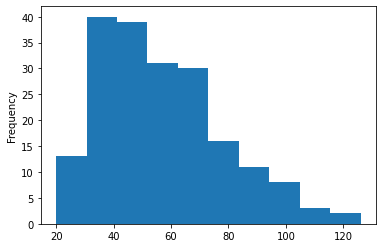

In [65]:
# Plot a histogram showing how common different counts are
train_aug.groupby('label').count()['fn'].plot(kind='hist')

In [66]:
train.shape, train_aug.shape

((1109, 2), (10955, 2))

In [71]:
df = pd.concat([train, train_aug]).reset_index(drop=True)

In [72]:
df.shape

(12064, 2)

In [73]:
df.head(2)

,fn,label
0,audio_files/IV38R7F.wav,akawuka
1,audio_files/KM4SKWT.wav,banana


# Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split 

In [74]:
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T, axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
     
    return mfccsscaled

In [75]:
features = []

for index, row in df.iterrows():
    
    data = extract_features(Path(row["fn"]))
    
    features.append([data, row['label']])

In [76]:
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

In [77]:
featuresdf.shape

(12064, 2)

In [81]:
# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 

time: 16.9 ms


In [129]:
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

time: 9.35 ms


In [130]:
featuresdf.loc[0, 'feature'].shape

(40,)

time: 2.32 ms


In [131]:
x_train.shape, x_test.shape

((9651, 40), (2413, 40))

time: 1.76 ms


# Modeling V0 : No hyperparameter opt

In [93]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

time: 543 µs


In [132]:
num_rows = 40
num_columns = 1
num_channels = 1

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

num_labels = yy.shape[1]
filter_size = 2

time: 973 µs


In [133]:
x_train.shape

(9651, 40, 1, 1)

time: 2.02 ms


In [155]:
# Construct model 
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2,
                 input_shape=(num_rows, num_columns, num_channels),
                 activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=1))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=1))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=1))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=1))
model.add(Dropout(0.2))

model.add(GlobalAveragePooling2D())

model.add(Dense(num_labels, activation='softmax'))

time: 89.5 ms


In [156]:
learning_rate = 0.01
num_epochs = 150
num_batch_size = 64 * 2

time: 445 µs


In [157]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate))

# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 40, 1, 16)         80        
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 40, 1, 16)         0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 40, 1, 16)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 40, 1, 32)         2080      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 40, 1, 32)         0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 40, 1, 32)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 40, 1, 64)       

In [158]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.001)
#early_stop = EarlyStopping(monitor='val_loss', patience=5)

time: 466 µs


In [159]:
model.fit(x_train, y_train,
          batch_size=num_batch_size,
          epochs=num_epochs,
          validation_data=(x_test, y_test),
          callbacks = [reduce_lr]) #, early_stop

Epoch 1/150
76/76 [==============================] - 3s 39ms/step - loss: 5.0664 - accuracy: 0.0147 - val_loss: 4.8665 - val_accuracy: 0.0257
Epoch 2/150
76/76 [==============================] - 3s 34ms/step - loss: 4.7773 - accuracy: 0.0255 - val_loss: 4.5516 - val_accuracy: 0.0344
Epoch 3/150
76/76 [==============================] - 3s 34ms/step - loss: 4.4790 - accuracy: 0.0438 - val_loss: 4.2293 - val_accuracy: 0.0667
Epoch 4/150
76/76 [==============================] - 3s 38ms/step - loss: 4.2096 - accuracy: 0.0708 - val_loss: 3.9503 - val_accuracy: 0.1098
Epoch 5/150
76/76 [==============================] - 3s 37ms/step - loss: 4.0092 - accuracy: 0.0900 - val_loss: 3.7332 - val_accuracy: 0.1409
Epoch 6/150
76/76 [==============================] - 3s 37ms/step - loss: 3.8504 - accuracy: 0.1089 - val_loss: 3.5006 - val_accuracy: 0.1828
Epoch 7/150
76/76 [==============================] - 3s 37ms/step - loss: 3.7188 - accuracy: 0.1272 - val_loss: 3.3494 - val_accuracy: 0.2018
Epoch 

76/76 [==============================] - 3s 36ms/step - loss: 1.8259 - accuracy: 0.5045 - val_loss: 1.5297 - val_accuracy: 0.6382
Epoch 116/150
76/76 [==============================] - 3s 36ms/step - loss: 1.8338 - accuracy: 0.5011 - val_loss: 1.5186 - val_accuracy: 0.6374
Epoch 117/150
76/76 [==============================] - 3s 36ms/step - loss: 1.8613 - accuracy: 0.4975 - val_loss: 1.5064 - val_accuracy: 0.6395
Epoch 118/150
76/76 [==============================] - 3s 36ms/step - loss: 1.8480 - accuracy: 0.5053 - val_loss: 1.5172 - val_accuracy: 0.6407
Epoch 119/150
76/76 [==============================] - 3s 35ms/step - loss: 1.8551 - accuracy: 0.4962 - val_loss: 1.5242 - val_accuracy: 0.6345
Epoch 120/150
76/76 [==============================] - 3s 35ms/step - loss: 1.8261 - accuracy: 0.5023 - val_loss: 1.5009 - val_accuracy: 0.6482
Epoch 121/150
76/76 [==============================] - 3s 34ms/step - loss: 1.8354 - accuracy: 0.5050 - val_loss: 1.5178 - val_accuracy: 0.6436
Epoch 

time: 6min 53s


In [160]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.7756708860397339
Testing Accuracy:  0.6477413773536682
time: 705 ms


# Predict & export

* Predict

In [192]:
predict = model.predict(x_test).argmax(1)

array([124,  89,  94, ..., 149,  79, 135])

time: 158 ms


In [199]:
pred_labels = le.inverse_transform(model.predict(x_test).argmax(1))

time: 156 ms


## Format submissions file

In [204]:
ss = pd.read_csv('SampleSubmission.csv')
ss.head()

,fn,maize streak virus,disease,okukkoola,muwogo,mpeke,mucungwa,greens,garden,mango,...,kasaanyi,suckers,insects,fertilizer,nakavundira,ekiwojjolo,akawuka,ddagala,ebiwojjolo,obutungulu
0,audio_files/00118N3.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,audio_files/00P0NMV.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,audio_files/01QEEZI.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,audio_files/037YAED.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,audio_files/0382N0Y.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


time: 44.6 ms


In [207]:
ss['fn'].nunique()

1017

time: 2.62 ms


In [237]:
for index, row in ss.iterrows():
    
    data = extract_features(Path(row["fn"]))
    
    #print(data.shape)
    
    x_pred = data.reshape(1, num_rows, num_columns, num_channels)
    y_pred = model.predict(x_pred)
    
    #label = le.inverse_transform(y_pred)
    labels = le.inverse_transform([i for i in range(num_labels)])
    
    #print(x_pred.shape, y_pred.shape)
    #print(labels.shape)
    
    ss.loc[index, list(labels)] = y_pred[0]

time: 1min 29s


In [212]:
ss.loc[0, ['disease', 'okukkoola']]

disease      0
okukkoola    0
Name: 0, dtype: object

time: 4.07 ms


In [238]:
ss.head()

,fn,maize streak virus,disease,okukkoola,muwogo,mpeke,mucungwa,greens,garden,mango,...,kasaanyi,suckers,insects,fertilizer,nakavundira,ekiwojjolo,akawuka,ddagala,ebiwojjolo,obutungulu
0,audio_files/00118N3.wav,1.552996e-03,5.063204e-18,3.500938e-10,2.142894e-07,1.025645e-15,5.539673e-09,1.482385e-03,0.000573,3.472691e-22,...,1.329746e-11,2.400657e-05,2.450357e-08,1.020212e-04,4.791061e-09,1.475507e-11,2.795463e-07,2.007946e-15,0.000014,1.307986e-07
1,audio_files/00P0NMV.wav,3.106661e-08,5.461389e-08,3.127735e-06,3.715923e-07,3.993935e-04,7.744158e-06,1.961744e-06,0.000024,4.293693e-12,...,8.489163e-02,1.139307e-05,1.488832e-08,1.522029e-07,3.250562e-02,1.351700e-03,4.711401e-04,4.247970e-03,0.000303,4.837729e-05
2,audio_files/01QEEZI.wav,4.761694e-08,2.701513e-08,3.781851e-03,5.971154e-04,4.027013e-03,2.108422e-01,6.867903e-07,0.000085,3.932869e-15,...,1.379195e-05,2.194373e-05,1.645352e-05,4.099851e-05,1.341175e-04,1.410237e-04,2.918708e-04,7.094085e-06,0.004472,1.112092e-02
3,audio_files/037YAED.wav,6.408780e-09,1.236258e-08,3.272136e-05,9.928821e-05,5.392688e-06,3.926380e-07,4.639909e-11,0.005775,1.342375e-16,...,3.426840e-06,3.519532e-02,5.540369e-07,4.572757e-12,1.883203e-06,2.276616e-07,1.226032e-04,4.925668e-10,0.000001,1.949017e-04
4,audio_files/0382N0Y.wav,8.334030e-07,3.872170e-07,1.748697e-04,4.684270e-06,1.660842e-03,3.064906e-03,6.056362e-11,0.000008,3.016502e-17,...,5.262511e-07,4.643928e-07,1.272146e-07,2.320679e-07,3.069416e-06,3.522294e-05,4.083606e-07,2.743805e-04,0.000581,6.819103e-03


time: 24.9 ms


In [248]:
sn = ss.copy()

time: 1.95 ms


In [250]:
ss = ss.set_index(ss['fn'], drop=True).drop('fn', 1)

time: 741 µs


In [254]:
ss.drop('fn', 1, inplace=True)

time: 2.07 ms


In [259]:
ss.apply(sum, axis=1).mean()

1.0000000055303588

time: 23.3 ms


In [261]:
ss.to_csv('Submission1.csv', index=False)

time: 414 ms
